## Literacy Data of Indians

The dataset contains data on Indian cities (sourced from Govt of India website) and has information about various characteristics.

Columns for the dataset are as follows:
>a. 'name_of_city' : Name of the City  
>b. 'state_code' : State Code of the City  
>c. 'state_name' : State Name of the City  
>d. 'dist_code' : District Code where the city belongs ( 99 means multiple district )  
>e. 'population_total' : Total Population 'population_male' : Male Population 'population_female' : Female Population  
>f. '0-‐6_population_total' : 0-‐6 Age Total Population '0-‐6_population_male' : 0-‐6 Age Male Population   
>g. '0-‐6_population_female' : 0-‐6 Age Female Population 'literates_total' : Total Literates  
>h. 'literates_male' : Male Literates 'literates_female' : Female Literates 'sex_ratio' : Sex Ratio 'child_sex_ratio' : Sex ratio in 0-‐6  
>i. 'effective_literacy_rate_total' : Literacy rate over Age 7 'effective_literacy_rate_male' : Male Literacy rate over Age 7   >j. 'effective_literacy_rate_female': Female Literacy rate over Age 7 'location' : Lat,Lng  
>k. 'total_graduates' : Total Number of Graduates 'male_graduates' : Male Graduates 'female_graduates' : Female Graduates  

Conduct an EDA on the dataset and try to uncover meaningful and/or interesting insights from the dataset. Before conducting the EDA state the questions that you would want to address from the dataset, and then conduct analyses accordingly.

### A. INITIAL PROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

# Below lines of code are to provide the path of the Basemap module on the local system. Should be commented for other systems 
import os
os.environ["PROJ_LIB"] = "C:\\Users\\rayde\\anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

In [2]:
#matplotlib.style.use('ggplot')
plt.style.use('seaborn-whitegrid')

In [3]:
# Read the dataset and then view the top few records and the summary of the data
cities = pd.read_csv("Indian_cities.csv") 
print (cities.head())

  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  literates_female  \
0                 8587                   7283  ...             44972   
1                 6186    

In [4]:
# Let us have a look at the data received to identify any null/ missing values
print (cities.describe())

       state_code   dist_code  population_total  population_male  \
count  493.000000  493.000000      4.930000e+02     4.930000e+02   
mean    18.643002   16.782961      4.481124e+05     2.343468e+05   
std      9.297168   15.566131      1.033228e+06     5.487786e+05   
min      1.000000    1.000000      1.000360e+05     5.020100e+04   
25%      9.000000    7.000000      1.261420e+05     6.638400e+04   
50%     19.000000   13.000000      1.841330e+05     9.665500e+04   
75%     27.000000   21.000000      3.490330e+05     1.750550e+05   
max     35.000000   99.000000      1.247845e+07     6.736815e+06   

       population_female  0-6_population_total  0-6_population_male  \
count       4.930000e+02          4.930000e+02           493.000000   
mean        2.137656e+05          4.709285e+04         24849.527383   
std         4.848622e+05          1.050279e+05         55535.310272   
min         4.512600e+04          6.547000e+03          3406.000000   
25%         6.041100e+04        

## QUESTIONS TO SEARCH ANSWERS FOR

**1. Which states are most represented in the dataset?**  
**2. Which state has the highest and lowest literacy rates?**   
**3. Which state has the highest graduate counts?**   
**4. Which state has the highest and lowest number of literates graduating?**   
**5. Which state has the highest number of infants?**  
**6. Which state has the highest number of infants:adults ratio?**  
**7. For the cities with the highest population**  
>**a. Which city has the highest literacy rate?**   
>**b. Which city has the highest Female to Male gender ratio?**   
>**c. Which city has the highest infants:adults ratio?**   
>**d. Which city has the highest number of literates graduating?**   **   

### B. ANALYSIS OF STATES 

#### B.1. DATA PREPARATION 

Let us prepare the data for the states by aggegating the respective columns. The dataset so prepared can be utilized for answering all the questions at the state level.

In [5]:
state_cities = cities.groupby(['state_code', 'state_name']).agg({"name_of_city": np.size,"population_total": sum, 
                                                               "population_male": sum, 
                                                               "population_female": sum, "0-6_population_total": sum, 
                                                               "0-6_population_male": sum, "0-6_population_female": sum, 
                                                               "literates_total": sum, "literates_male": sum, 
                                                               "literates_female": sum, "sex_ratio": np.mean, 
                                                               "child_sex_ratio": np.mean, 
                                                               "effective_literacy_rate_total": np.mean, 
                                                               "effective_literacy_rate_male": np.mean, 
                                                               "effective_literacy_rate_female": np.mean, 
                                                               "total_graduates": sum, "male_graduates": sum, 
                                                               "female_graduates": sum})

Let us remove the 'state_name' column from the index of the above dataset to allow us ease of access for all chart plotting. 

In [6]:
state_cities.reset_index(inplace = True)
state_cities.set_index('state_code', inplace=True)
print (state_cities.head())

                  state_name  name_of_city  population_total  population_male  \
state_code                                                                      
1            JAMMU & KASHMIR             3           1804987           953292   
2           HIMACHAL PRADESH             1            169758            93364   
3                     PUNJAB            16           5821876          3106473   
4                 CHANDIGARH             1            960787           525226   
5                UTTARAKHAND             6           1340397           706939   

            population_female  0-6_population_total  0-6_population_male  \
state_code                                                                 
1                      851695                208889               112243   
2                       76394                 13646                 7221   
3                     2715403                593327               319935   
4                      435561                104192 

The column 'name_of_city' is incorrect as it currently houses the number of cities. So, let us rename it.

In [7]:
state_cities.rename(columns={'name_of_city': 'number_of_cities'}, inplace = True)
print (state_cities.head())

                  state_name  number_of_cities  population_total  \
state_code                                                         
1            JAMMU & KASHMIR                 3           1804987   
2           HIMACHAL PRADESH                 1            169758   
3                     PUNJAB                16           5821876   
4                 CHANDIGARH                 1            960787   
5                UTTARAKHAND                 6           1340397   

            population_male  population_female  0-6_population_total  \
state_code                                                             
1                    953292             851695                208889   
2                     93364              76394                 13646   
3                   3106473            2715403                593327   
4                    525226             435561                104192   
5                    706939             633458                150617   

            0-6_po

#### B.2. ANALYSIS - CITY COUNT PER STATE

First of all let us try to understand how many cities for each state are covered in the dataset.

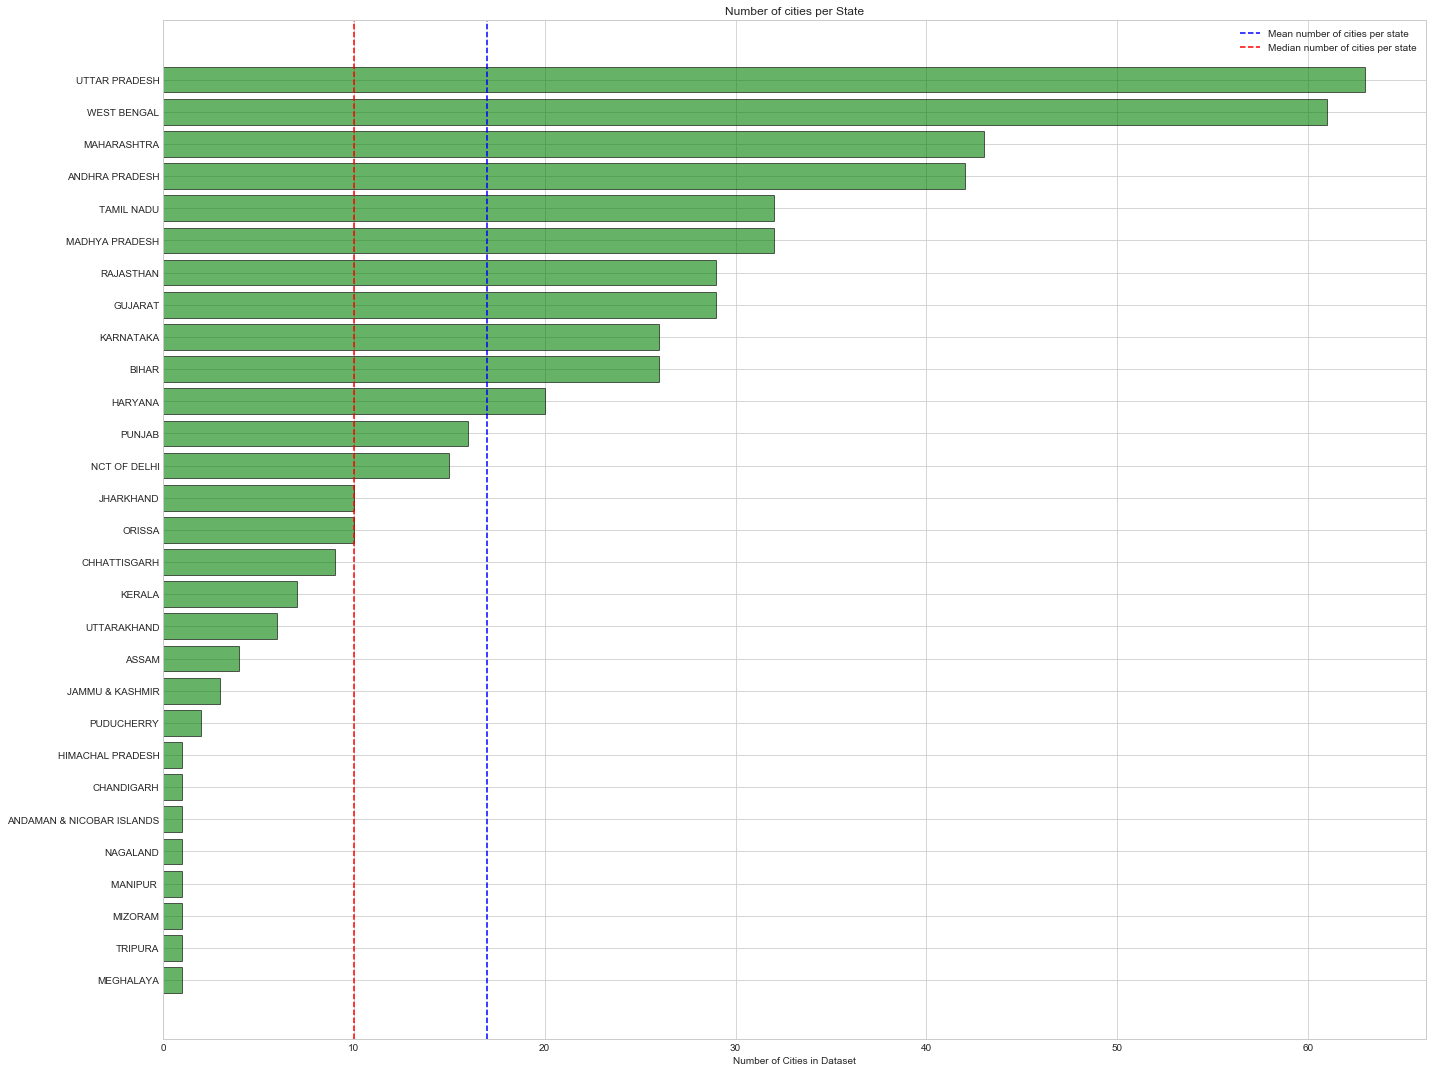

In [8]:
state_cities.sort_values(['number_of_cities'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(state_cities['state_name'], state_cities['number_of_cities'], color = "green", 
         edgecolor = "black", alpha = 0.6)
plt.axvline(x= np.mean(state_cities['number_of_cities']), color = "blue", 
            linestyle = "dashed", label = "Mean number of cities per state")
plt.axvline(x= np.median(state_cities['number_of_cities']), color = "red", 
            linestyle = "dashed", label = "Median number of cities per state")
plt.title("Number of cities per State")
plt.xlabel("Number of Cities in Dataset")
plt.legend()
plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - CITY COUNT PER STATE

1. Uttar Pradesh has the highest number of cities followed by West Bengal in the dataset
2. Chandigarh, Manipura, Tripura, Himachal Pradesh, Mizoram, Meghalaya, Nagaland and Andaman & Nicobar Islands have just one city in the dataset
3. The mean number of cities per state is 17, whereas median number of cities is 10

In [9]:
print ("INFERENCE OF ANALYSIS - CITY COUNT PER STATE")
print ("--------------------------------------------")
print ("")
print ("\t 1.Uttar Pradesh has the highest number of cities followed by West Bengal in the dataset")
print ("\t 2.Chandigarh, Manipura, Tripura, Himachal Pradesh, Mizoram, Meghalaya, Nagaland and Andaman & Nicobar Islands have just one city in the dataset")
print ("\t 3.The mean number of cities per state is 17, whereas median number of cities is 10")

INFERENCE OF ANALYSIS - CITY COUNT PER STATE
--------------------------------------------

	 1.Uttar Pradesh has the highest number of cities followed by West Bengal in the dataset
	 2.Chandigarh, Manipura, Tripura, Himachal Pradesh, Mizoram, Meghalaya, Nagaland and Andaman & Nicobar Islands have just one city in the dataset
	 3.The mean number of cities per state is 17, whereas median number of cities is 10


#### B.3. ANALYSIS - LITERACY RATE PER STATE

Now, let us try to plot the cities rate for each of the states.

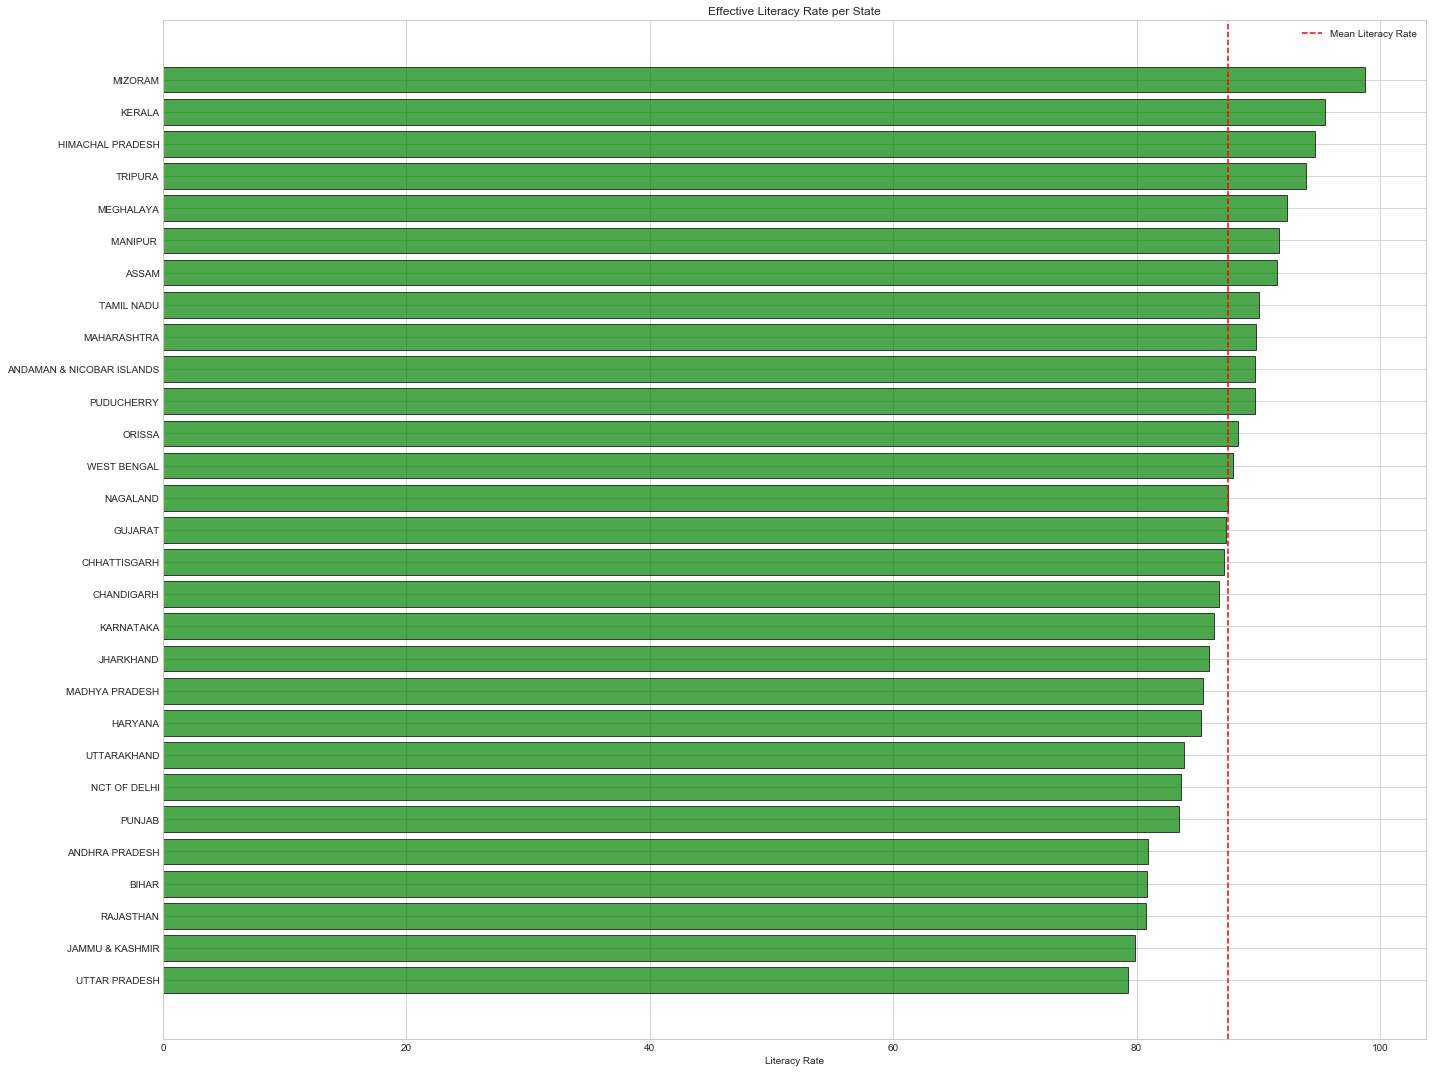

In [10]:
state_cities.sort_values(['effective_literacy_rate_total'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(state_cities['state_name'], state_cities['effective_literacy_rate_total'], color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.axvline(x = np.mean(state_cities['effective_literacy_rate_total']), color = "red", 
            linestyle = "dashed", label = "Mean Literacy Rate")
plt.title("Effective Literacy Rate per State")
plt.xlabel("Literacy Rate")
plt.legend()
plt.tight_layout()
plt.show()

##### ANALYSIS - LITERACY RATE (GENDER WISE) PER STATE

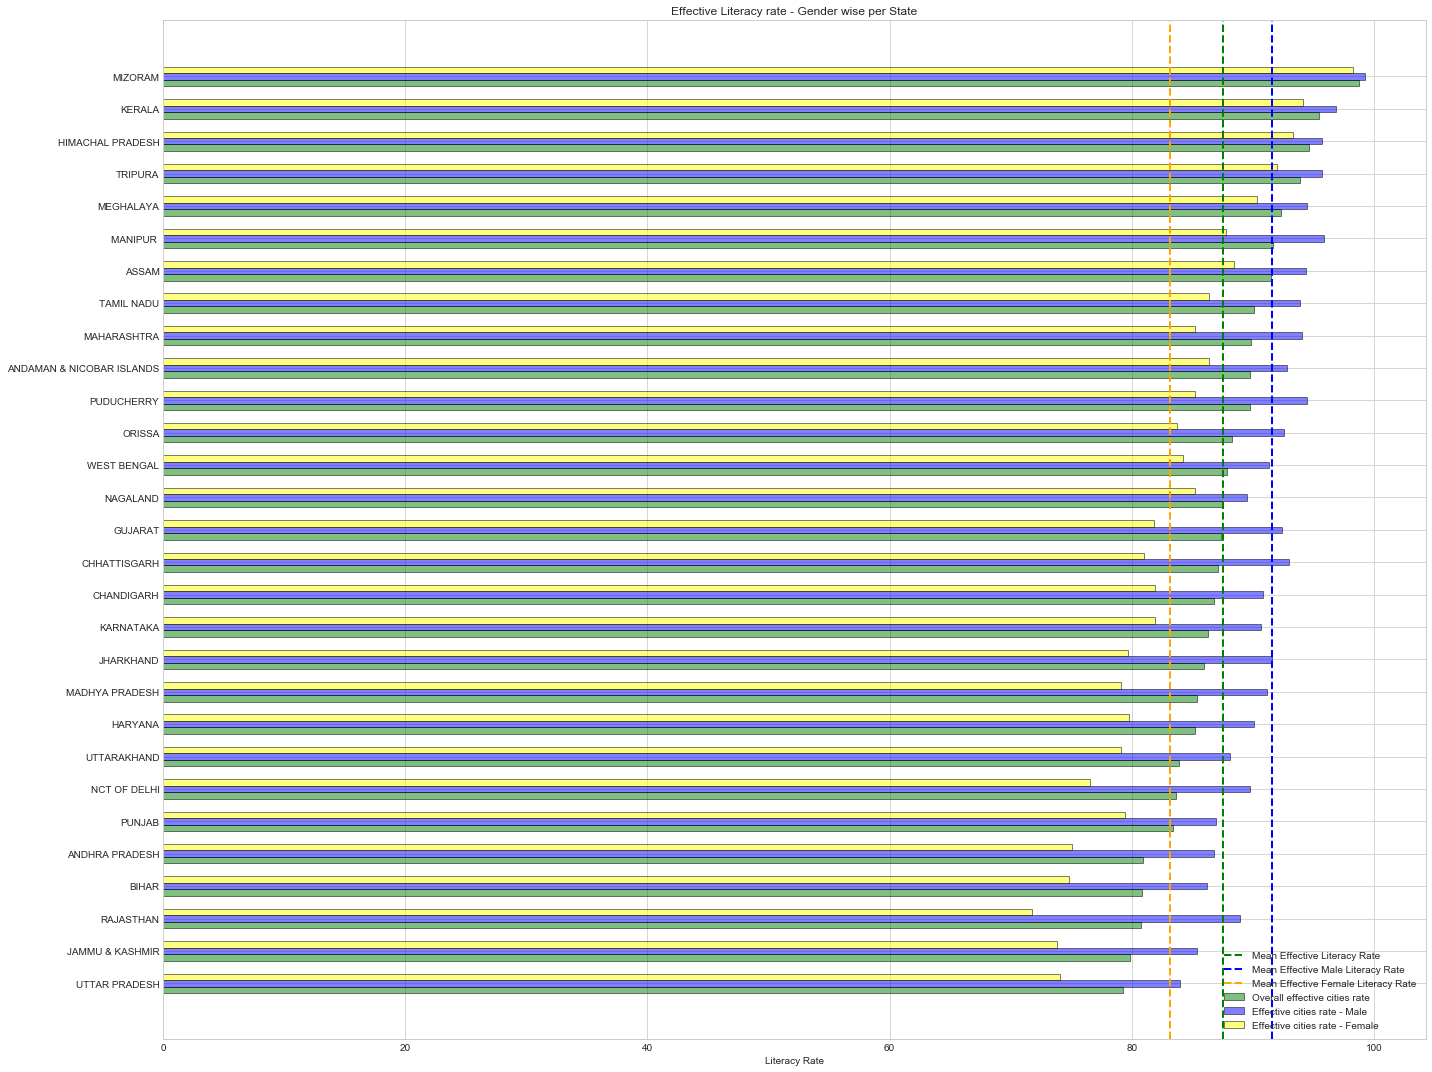

In [11]:
figure = plt.figure(figsize = (20,15))
barWidth = 0.20
y_pos = np.arange(len(state_cities['state_name']))
plt.barh(y_pos - barWidth, state_cities['effective_literacy_rate_total'], height = barWidth, 
         color = "green", edgecolor = "black", alpha = 0.5, label = "Overall effective cities rate")
plt.barh(y_pos, state_cities['effective_literacy_rate_male'], height = barWidth, 
         color = "blue", edgecolor = "black", alpha = 0.5, label = "Effective cities rate - Male")
plt.barh(y_pos + barWidth, state_cities['effective_literacy_rate_female'],  height = barWidth,
         color = "yellow", edgecolor = "black", alpha = 0.5, label = "Effective cities rate - Female")

plt.title("Effective Literacy rate - Gender wise per State")
plt.xlabel("Literacy Rate")
plt.yticks(ticks = y_pos, labels = state_cities['state_name'])

plt.axvline(x = np.mean(state_cities['effective_literacy_rate_total']), linestyle = "dashed", 
            linewidth = 2 , color = "green", label = "Mean Effective Literacy Rate")
plt.axvline(x = np.mean(state_cities['effective_literacy_rate_male']), linestyle = "dashed", 
            linewidth = 2 ,color = "blue", label = "Mean Effective Male Literacy Rate")
plt.axvline(x = np.mean(state_cities['effective_literacy_rate_female']), linestyle = "dashed", 
            linewidth = 2 ,color = "orange", label = "Mean Effective Female Literacy Rate")

plt.legend()
plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - LITERACY RATE PER STATE

1. Mizoram has the highest literacy rate followed by Kerala. Even individual gender wise, these states are the clear leaders.
2. In general the literacy rate for Male is better than Female in all the states.
3. Uttar Pradesh has the worst literacy rate amongst the states.
4. Amongst males, again Uttar Pradesh has the worst literacy rate.
5. However, among females, the worst literacy rate is in Rajasthan.
6. Mean literacy rate amongst male is around 90%, females around 82%. Overall mean literacy rate across states is around 86%.

In [12]:
print ("INFERENCE OF ANALYSIS - LITERACY RATE PER STATE")
print ("-----------------------------------------------")
print ("")
print ("\t 1.Mizoram has the highest literacy rate followed by Kerala. Even individual gender wise, these states are the clear leaders.")
print ("\t 2.In general the literacy rate for Male is better than Female in all the states.")
print ("\t 3.Uttar Pradesh has the worst literacy rate amongst the states.")
print ("\t 4.Amongst males, again Uttar Pradesh has the worst literacy rate.")
print ("\t 5.However, among females, the worst literacy rate is in Rajasthan.")
print ("\t 6.Mean literacy rate amongst male is around 90%, females around 82%. Overall mean literacy rate across states is around 86%.")

INFERENCE OF ANALYSIS - LITERACY RATE PER STATE
-----------------------------------------------

	 1.Mizoram has the highest literacy rate followed by Kerala. Even individual gender wise, these states are the clear leaders.
	 2.In general the literacy rate for Male is better than Female in all the states.
	 3.Uttar Pradesh has the worst literacy rate amongst the states.
	 4.Amongst males, again Uttar Pradesh has the worst literacy rate.
	 5.However, among females, the worst literacy rate is in Rajasthan.
	 6.Mean literacy rate amongst male is around 90%, females around 82%. Overall mean literacy rate across states is around 86%.


#### B.4. ANALYSIS - GRADUATES PER STATE

Now, let us try to plot the graduates for each of the states.

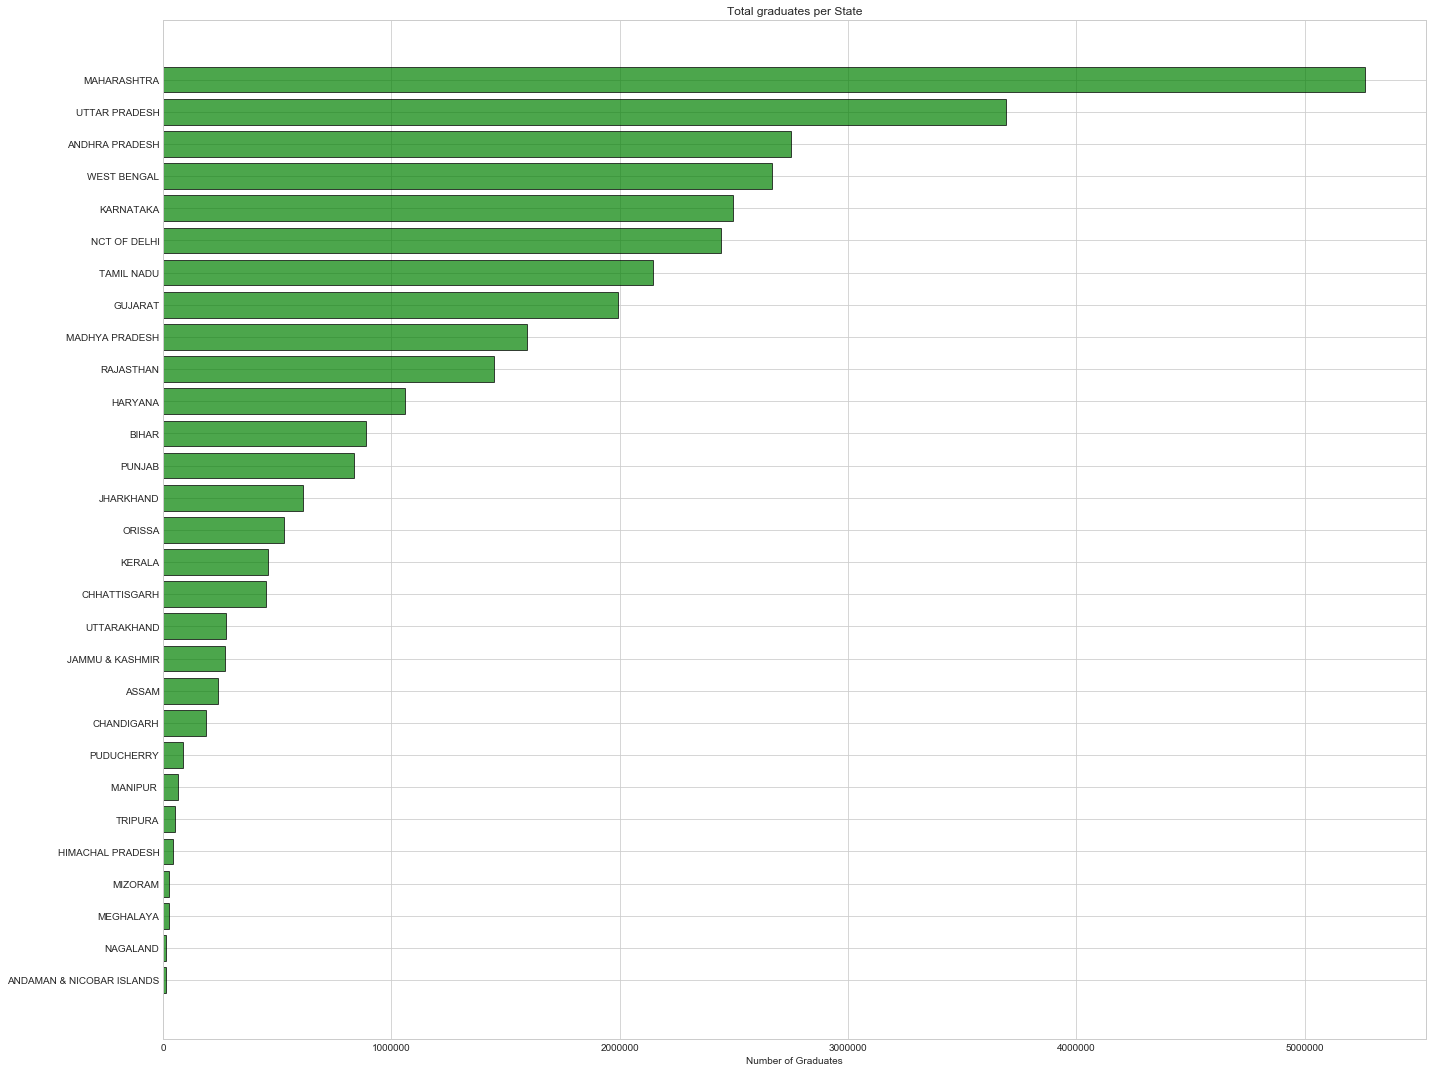

In [13]:
state_cities.sort_values(['total_graduates'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(state_cities['state_name'], state_cities['total_graduates'], color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.title("Total graduates per State")
plt.xlabel("Number of Graduates")
plt.tight_layout()
plt.show()

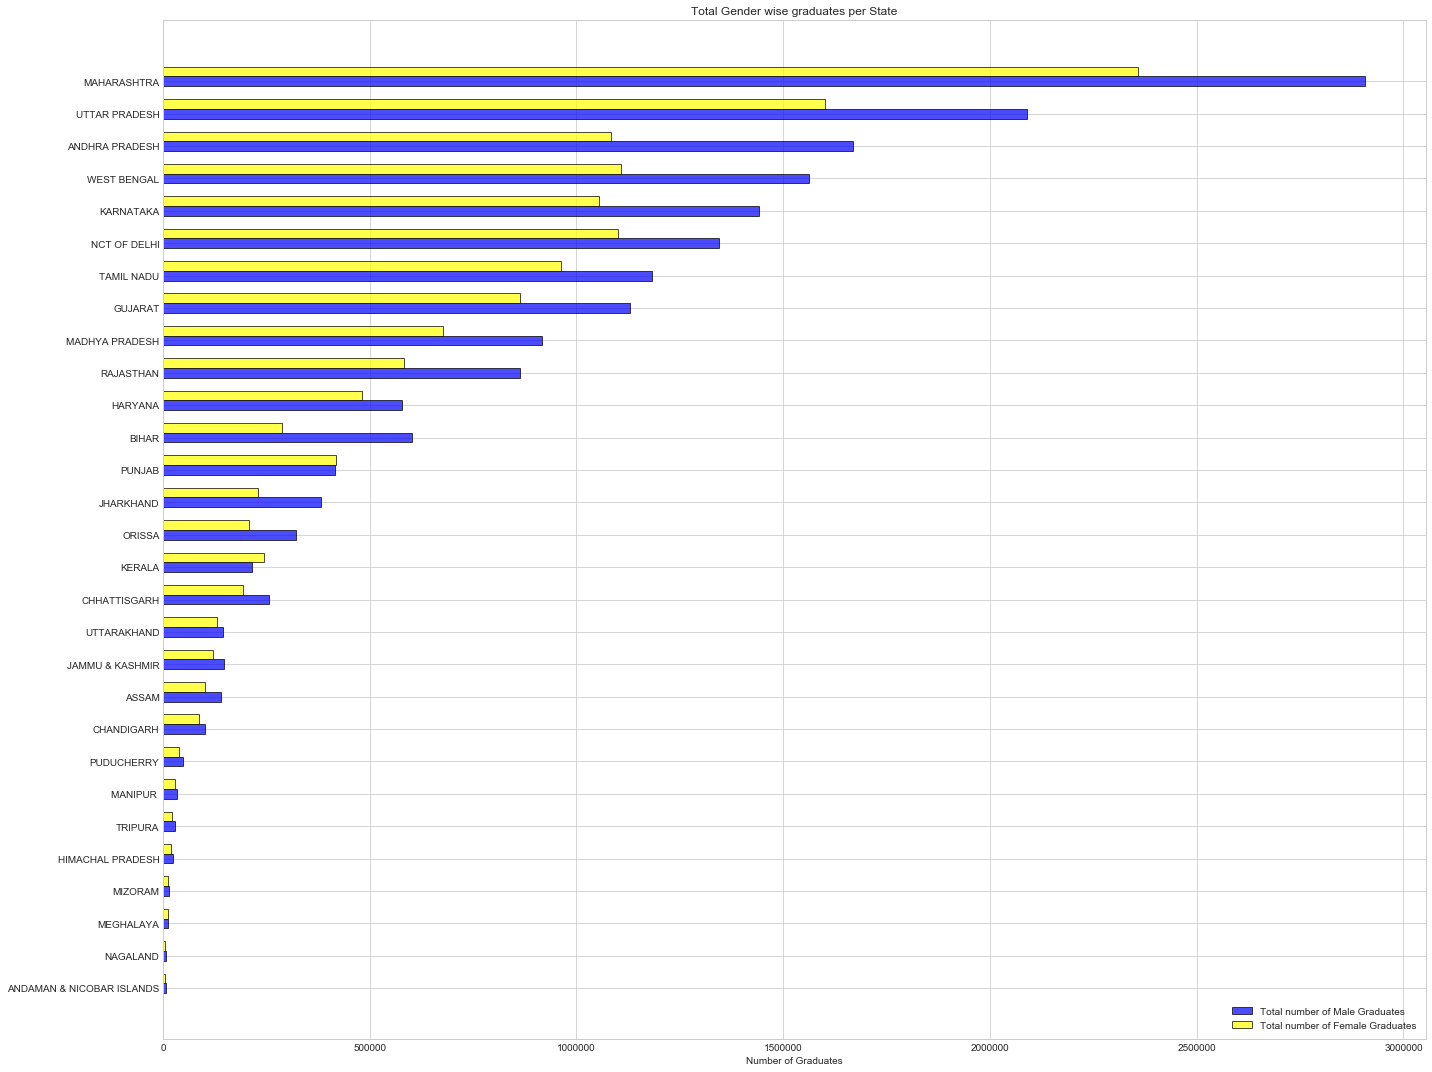

In [14]:
figure = plt.figure(figsize = (20,15))
barWidth = 0.3
pos_y = np.arange(len(state_cities['state_name']))
plt.barh(pos_y, state_cities['male_graduates'], height = barWidth, color = "blue", 
         edgecolor = "black", alpha = 0.7, label = "Total number of Male Graduates")
plt.barh(pos_y + barWidth, state_cities['female_graduates'], height = barWidth, color = "yellow", 
         edgecolor = "black", alpha = 0.7, label = "Total number of Female Graduates")
plt.yticks(ticks=np.arange(len(state_cities['state_name'])), labels=state_cities['state_name'])
plt.title("Total Gender wise graduates per State")
plt.xlabel("Number of Graduates")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

Even though Maharashtra is a clear leader in terms of the overall number of graduates, total number of male and female graduates.  
Let us take it a step further to analyze it as a percentage of the state population considered in the dataset. 
While doing so, we will consider the **count of graduates with respect to the number of literates** instead of the total population. This will give us **an idea of how much support is provided by the state for education beyond the primary level**.

In [15]:
state_cities['grads_percent'] = round(state_cities['total_graduates']/ state_cities['literates_total'],2)
state_cities['male_grads_percent'] = round(state_cities['male_graduates']/ state_cities['literates_male'],2)
state_cities['female_grads_percent'] = round(state_cities['female_graduates']/ state_cities['literates_female'],2)

Now let us plot the percentage numbers to understand how each state fairs in terms of graduates.

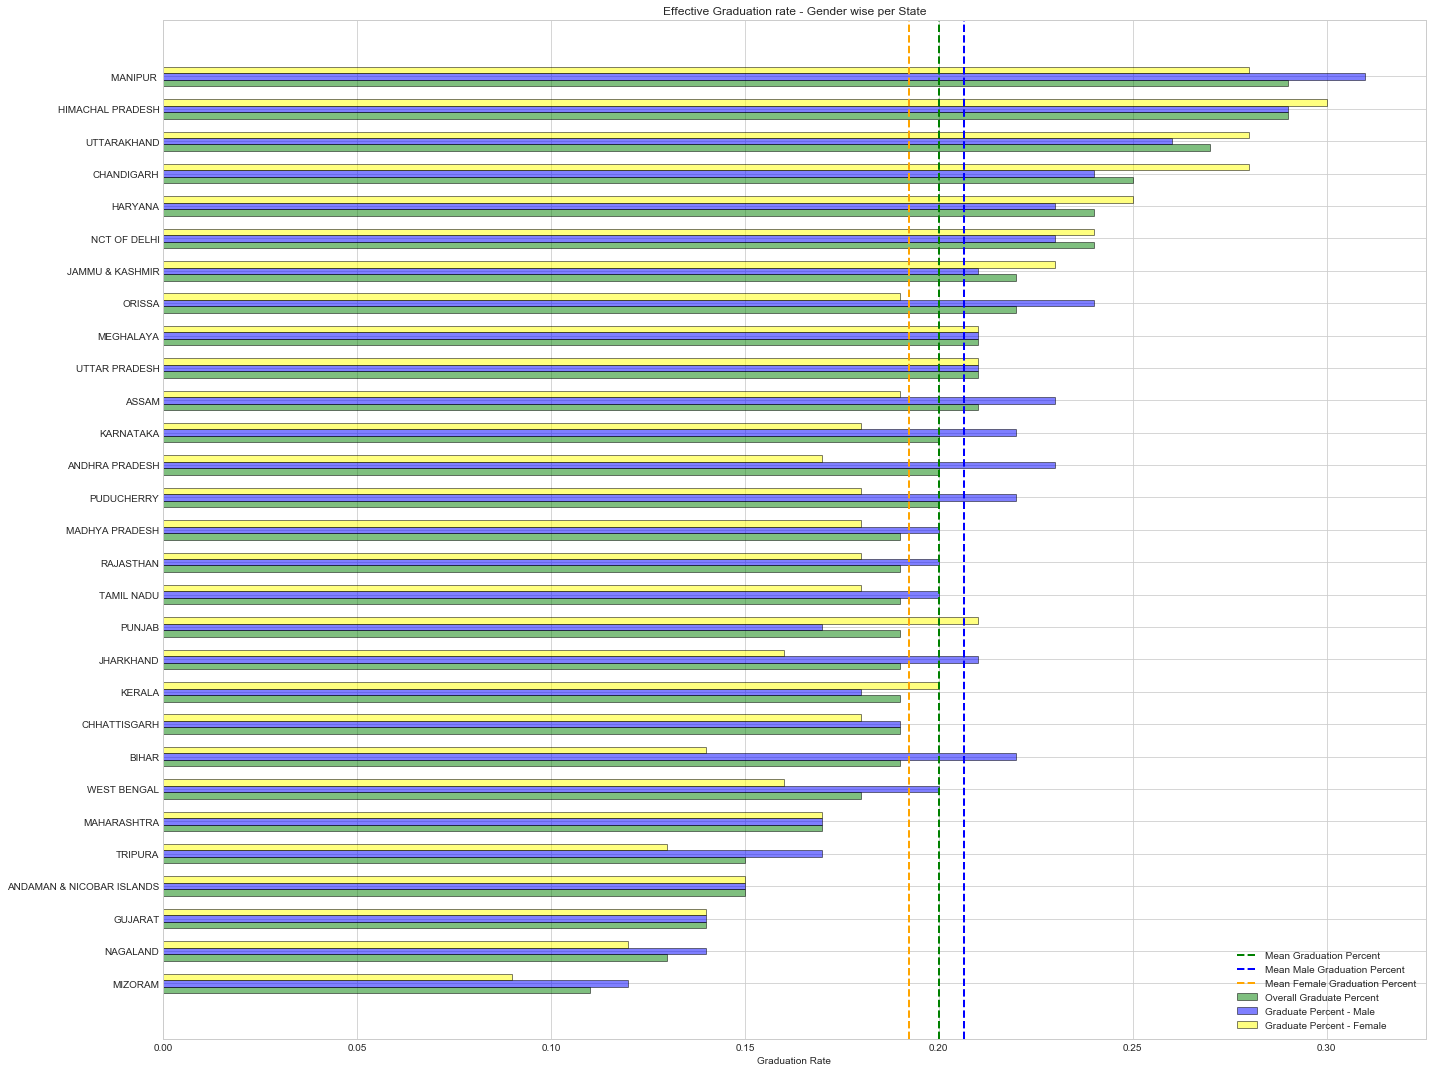

In [16]:
state_cities.sort_values(['grads_percent'], inplace= True)
figure = plt.figure(figsize = (20,15))
barWidth = 0.20
y_pos = np.arange(len(state_cities['state_name']))
plt.barh(y_pos - barWidth, state_cities['grads_percent'], height = barWidth, color = "green", 
         edgecolor = "black", alpha = 0.5, label = "Overall Graduate Percent")
plt.barh(y_pos, state_cities['male_grads_percent'], color = "blue", height = barWidth, 
         edgecolor = "black", alpha = 0.5, label = "Graduate Percent - Male")
plt.barh(y_pos + barWidth, state_cities['female_grads_percent'],  height = barWidth,color = "yellow", 
         edgecolor = "black", alpha = 0.5, label = "Graduate Percent - Female")
plt.title("Effective Graduation rate - Gender wise per State")
plt.xlabel("Graduation Rate")
#plt.axvline(x = np.mean(state_cities['effective_literacy_rate_total']), color = "red", linestyle = "dashed", label = "Mean Literacy Rate")
plt.yticks(ticks = y_pos, labels = state_cities['state_name'])

plt.axvline(x = np.mean(state_cities['grads_percent']), linestyle = "dashed", linewidth = 2 , 
            color = "green", label = "Mean Graduation Percent")
plt.axvline(x = np.mean(state_cities['male_grads_percent']), linestyle = "dashed", linewidth = 2 ,
            color = "blue", label = "Mean Male Graduation Percent")
plt.axvline(x = np.mean(state_cities['female_grads_percent']), linestyle = "dashed", linewidth = 2 ,
            color = "orange", label = "Mean Female Graduation Percent")

plt.legend()

plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - GRADUATES PER STATE

1. Maharashtra has the higest number of graduates by absolute numbers in both Male and Female category followed by Uttar Pradesh
2. However when we consider, how many of the literates actually go for graduation; Manipur and Himachal Pradesh are the leaders with Maharashtra being in the bottom half.
3. Himachal Pradesh has the highest number of female population who graduate. In fact the female graduation rate is higher than the graduation rate of males in the state.
4. The mean graduation rate across states for males stand around 20.5%, for females around 19.5% and overall at 20%.
5. Mizoram has the least number of graduates to literates ratio.

In [17]:
print ("INFERENCE OF ANALYSIS - GRADUATES PER STATE")
print ("-------------------------------------------")
print ("")
print ("\t 1.Maharashtra has the higest number of graduates by absolute numbers in both Male and Female category followed by Uttar Pradesh.")
print ("\t 2.However when we consider, how many of the literates actually go for graduation; Manipur and Himachal Pradesh are the leaders with Maharashtra being in the bottom half.")
print ("\t 3.Himachal Pradesh has the highest number of female population who graduate. In fact the female graduation rate is higher than the graduation rate of males in the state.")
print ("\t 4.The mean graduation rate across states for males stand around 20.5%, for females around 19.5% and overall at 20%.")
print ("\t 5.Mizoram has the least number of graduates to literates ratio.")

INFERENCE OF ANALYSIS - GRADUATES PER STATE
-------------------------------------------

	 1.Maharashtra has the higest number of graduates by absolute numbers in both Male and Female category followed by Uttar Pradesh.
	 2.However when we consider, how many of the literates actually go for graduation; Manipur and Himachal Pradesh are the leaders with Maharashtra being in the bottom half.
	 3.Himachal Pradesh has the highest number of female population who graduate. In fact the female graduation rate is higher than the graduation rate of males in the state.
	 4.The mean graduation rate across states for males stand around 20.5%, for females around 19.5% and overall at 20%.
	 5.Mizoram has the least number of graduates to literates ratio.


#### B.5. ANALYSIS - INFANT POPULATION

Now, let us try to understand the infant population per state. This taken in context with the Literacy/ Graduation rate, can help predict the future numbers for the state.

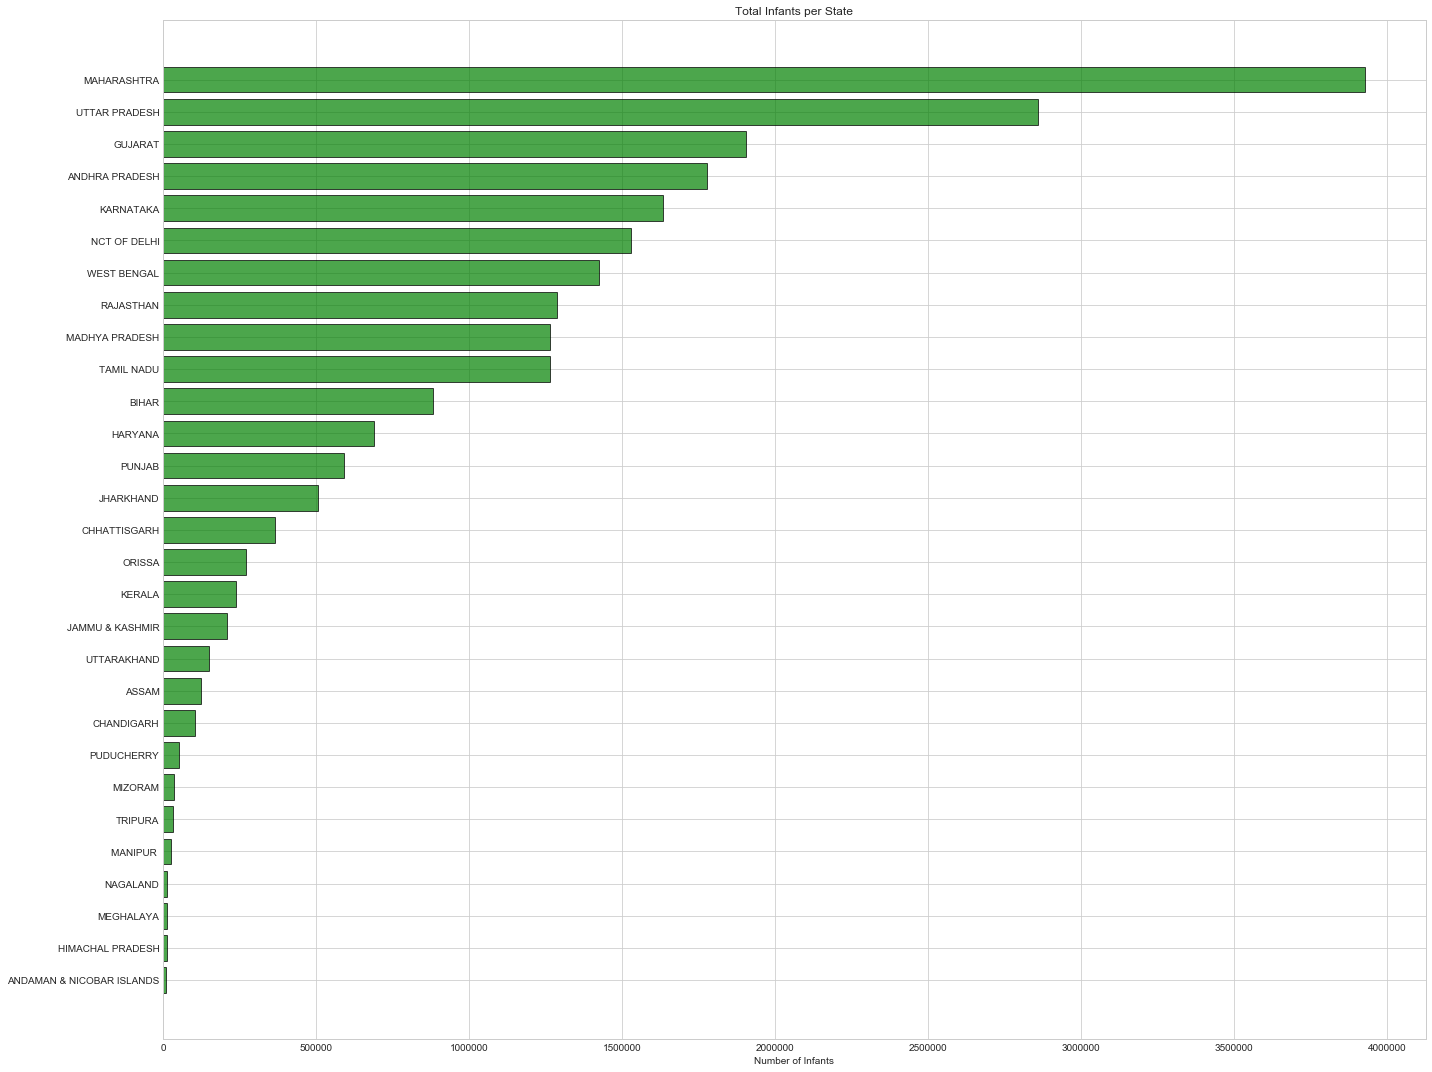

In [18]:
state_cities.sort_values(['0-6_population_total'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(state_cities['state_name'], state_cities['0-6_population_total'], color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.title("Total Infants per State")
plt.xlabel("Number of Infants")
plt.tight_layout()
plt.show()

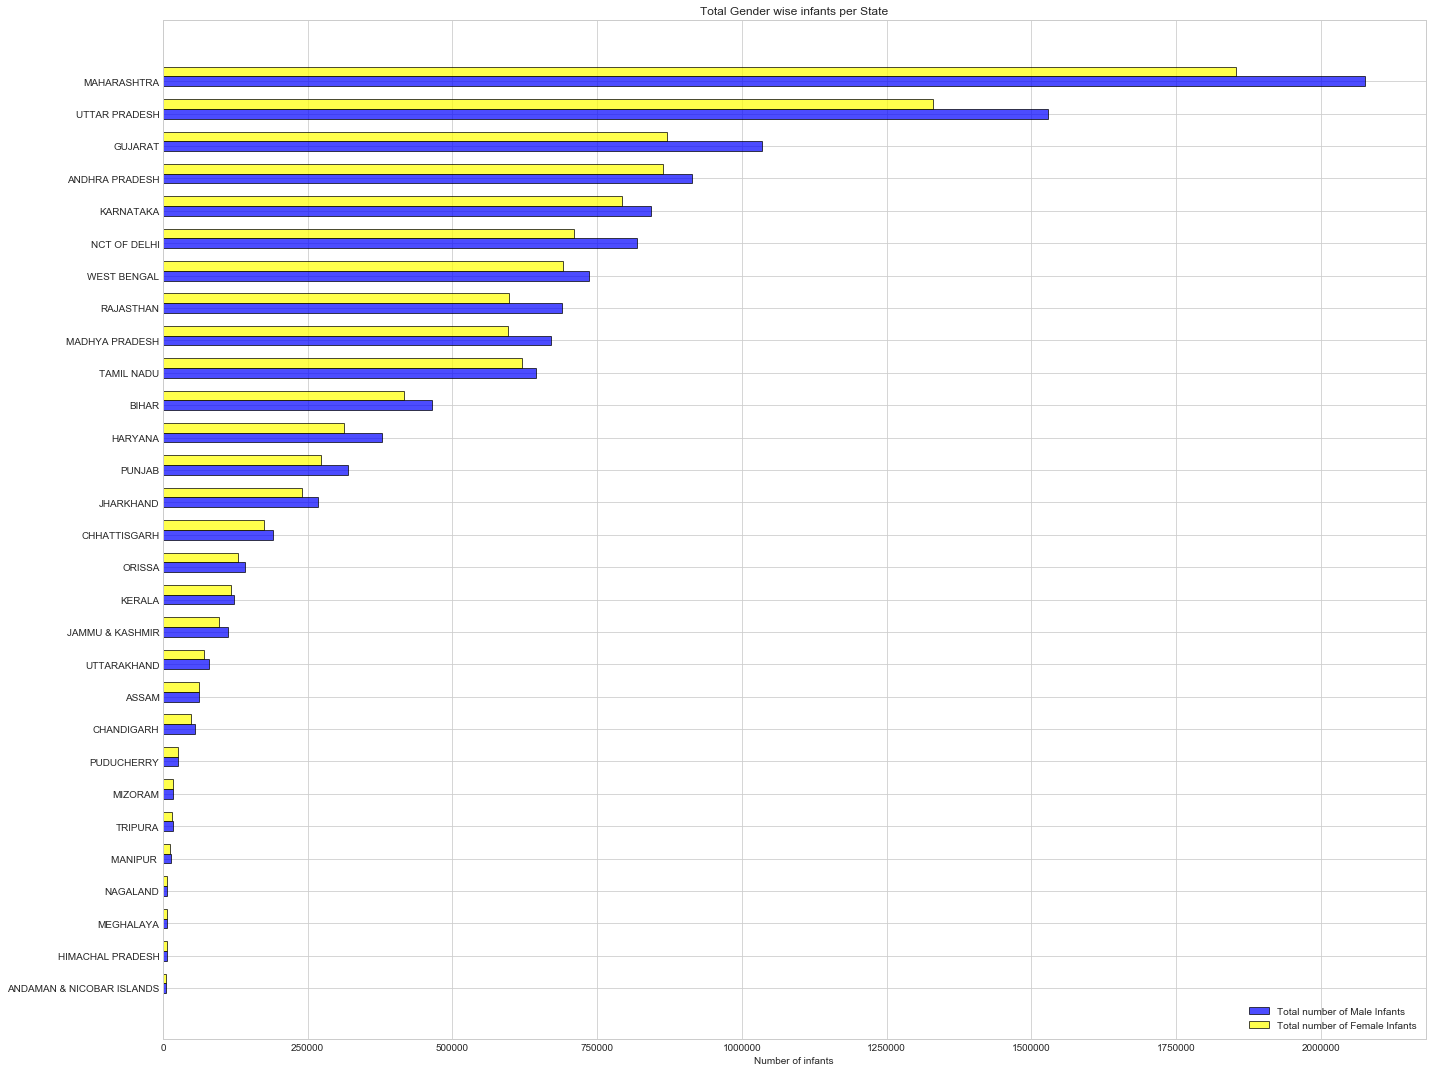

In [19]:
figure = plt.figure(figsize = (20,15))
barWidth = 0.3
pos_y = np.arange(len(state_cities['state_name']))
plt.barh(pos_y, state_cities['0-6_population_male'], height = barWidth, color = "blue", 
         edgecolor = "black", alpha = 0.7, label = "Total number of Male Infants")
plt.barh(pos_y + barWidth, state_cities['0-6_population_female'], height = barWidth, color = "yellow", 
         edgecolor = "black", alpha = 0.7, label = "Total number of Female Infants")
plt.yticks(ticks=np.arange(len(state_cities['state_name'])), labels=state_cities['state_name'])
plt.title("Total Gender wise infants per State")
plt.xlabel("Number of infants")
plt.legend(loc = "lower right")
plt.tight_layout()
plt.show()

Again here too, Maharashtra is a clear leader in terms of the overall number of infants, total number of male and female infants.  
We will take a step further to analyze it as a percentage of the state population considered in the dataset. 

In [20]:
state_cities['infants_percent'] = round(state_cities['0-6_population_total']/ state_cities['population_total'],2)
state_cities['male_infants_percent'] = round(state_cities['0-6_population_male']/ state_cities['population_total'],2)
state_cities['female_infants_percent'] = round(state_cities['0-6_population_female']/ state_cities['population_total'],2)

Now let us plot the percentage numbers to understand the infant ratios for each state.

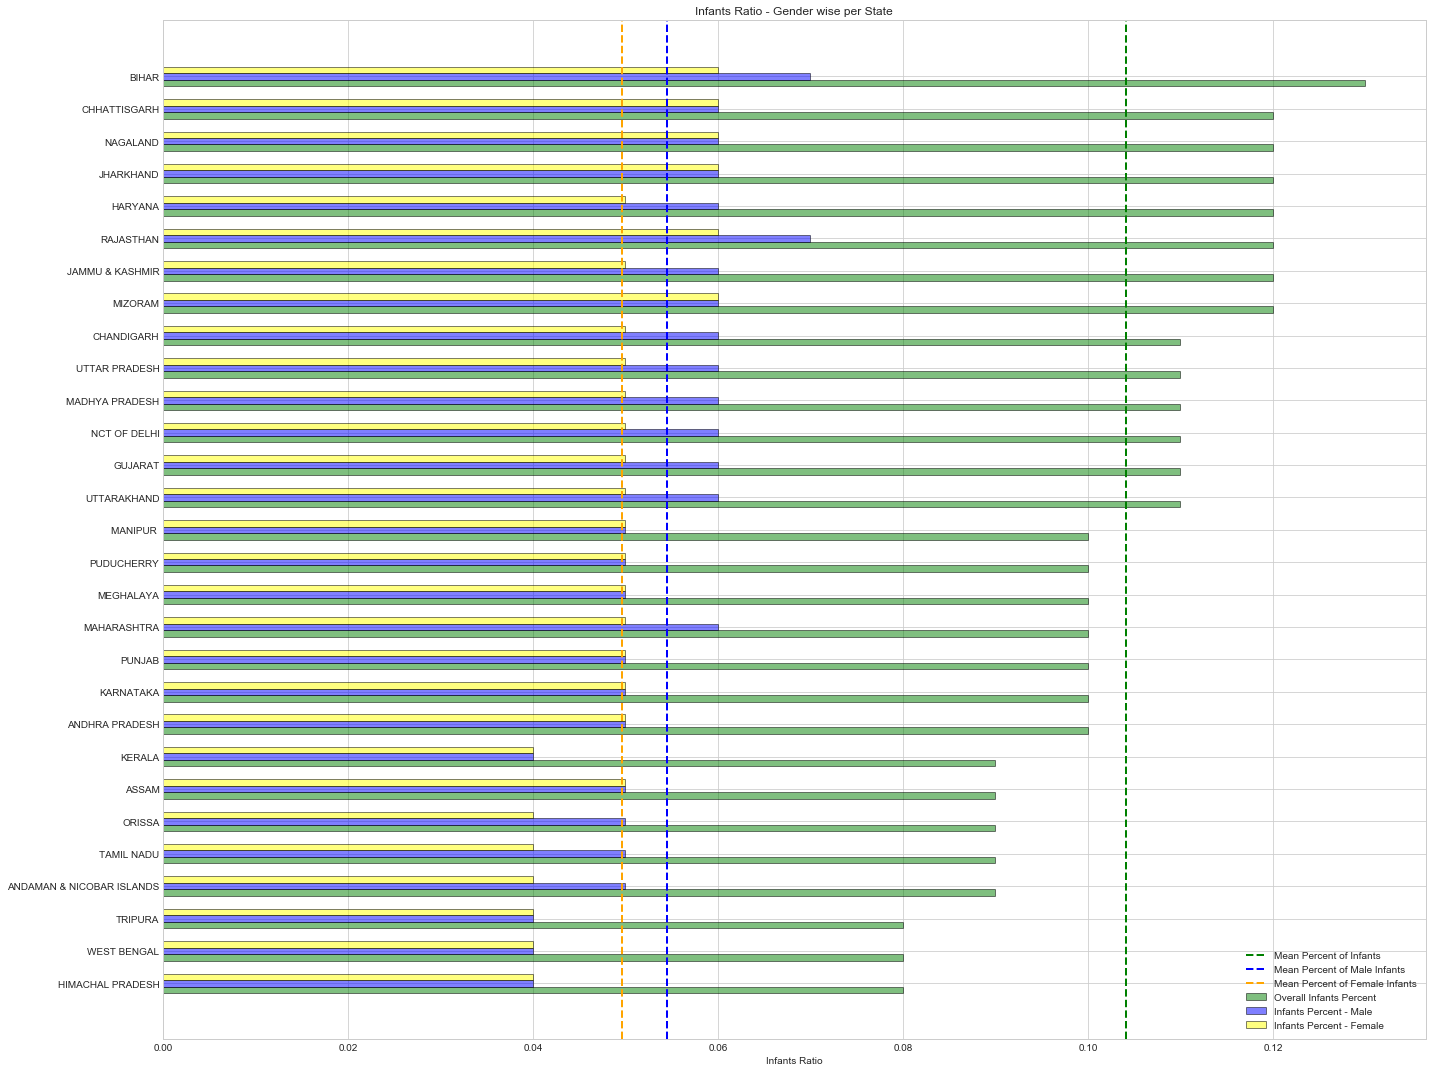

In [21]:
state_cities.sort_values(['infants_percent'], inplace= True)
figure = plt.figure(figsize = (20,15))
barWidth = 0.20
y_pos = np.arange(len(state_cities['state_name']))
plt.barh(y_pos - barWidth, state_cities['infants_percent'], height = barWidth, color = "green",
         edgecolor = "black", alpha = 0.5, label = "Overall Infants Percent")
plt.barh(y_pos, state_cities['male_infants_percent'], color = "blue", height = barWidth, 
         edgecolor = "black", alpha = 0.5, label = "Infants Percent - Male")
plt.barh(y_pos + barWidth, state_cities['female_infants_percent'],  height = barWidth,color = "yellow",
         edgecolor = "black", alpha = 0.5, label = "Infants Percent - Female")
plt.title("Infants Ratio - Gender wise per State")
plt.xlabel("Infants Ratio")
plt.yticks(ticks = y_pos, labels = state_cities['state_name'])

plt.axvline(x = np.mean(state_cities['infants_percent']), linestyle = "dashed", 
            linewidth = 2 , color = "green", label = "Mean Percent of Infants")
plt.axvline(x = np.mean(state_cities['male_infants_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "blue", label = "Mean Percent of Male Infants")
plt.axvline(x = np.mean(state_cities['female_infants_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "orange", label = "Mean Percent of Female Infants")

plt.legend()

plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - INFANT POPULATION

1. Maharashtra has the higest number of infants by absolute numbers in both Male and Female category followed by Uttar Pradesh
2. However when we consider, the ratio of infants to the state population; Bihar has the highest infancy ratio.
3. Least infancy ratio is in the states of Tripura, West Bengal and Himachal Pradesh.round 19.5% and overall at 20%.

In [22]:
print ("INFERENCE OF ANALYSIS - INFANT POPULATION")
print ("-----------------------------------------")
print ("")
print ("\t 1.Maharashtra has the higest number of infants by absolute numbers in both Male and Female category followed by Uttar Pradesh.")
print ("\t 2.However when we consider, the ratio of infants to the state population; Bihar has the highest infancy ratio.")
print ("\t 3.Least infancy ratio is in the states of Tripura, West Bengal and Himachal Pradesh.round 19.5% and overall at 20%.")

INFERENCE OF ANALYSIS - INFANT POPULATION
-----------------------------------------

	 1.Maharashtra has the higest number of infants by absolute numbers in both Male and Female category followed by Uttar Pradesh.
	 2.However when we consider, the ratio of infants to the state population; Bihar has the highest infancy ratio.
	 3.Least infancy ratio is in the states of Tripura, West Bengal and Himachal Pradesh.round 19.5% and overall at 20%.


### C. PLOTTING ON MAP 

#### C.1. DATA PREPARATION 

We want to now plot the data of the individual cities on the Indian map. However, the longitude and latitude are provided in a single column, location. So, we need to split it into two different columns.

In [23]:
getLatitude = lambda x: x.split(",")[0]
getLongitude = lambda x: x.split(",")[1]

cities["latitude"] = cities["location"].apply(getLatitude)
cities["longitude"] = cities["location"].apply(getLongitude)
print (cities.head())

  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  child_sex_ratio  \
0                 8587                   7283  ...              848   
1                 6186      

Considering the population of the cities vary between a minimum of 100036 and a maximum of 12478447, we can divide the population by the minimum to get the population in terms of a factor. 

In [24]:
cities['population_factor'] = round(cities["population_total"]/ 100000,2)
print (cities.head())

  name_of_city  state_code      state_name  dist_code  population_total  \
0      Abohar            3          PUNJAB          9            145238   
1    Achalpur           27     MAHARASHTRA          7            112293   
2    Adilabad           28  ANDHRA PRADESH          1            117388   
3   Adityapur           20       JHARKHAND         24            173988   
4       Adoni           28  ANDHRA PRADESH         21            166537   

   population_male  population_female  0-6_population_total  \
0            76840              68398                 15870   
1            58256              54037                 11810   
2            59232              58156                 13103   
3            91495              82493                 23042   
4            82743              83794                 18406   

   0-6_population_male  0-6_population_female  ...  \
0                 8587                   7283  ...   
1                 6186                   5624  ...   
2       

#### C.2. PLOT ON MAP

Now, India lies between the 8°4' north to 37°6' north latitude and 68°7' to 97°25' east longitude

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


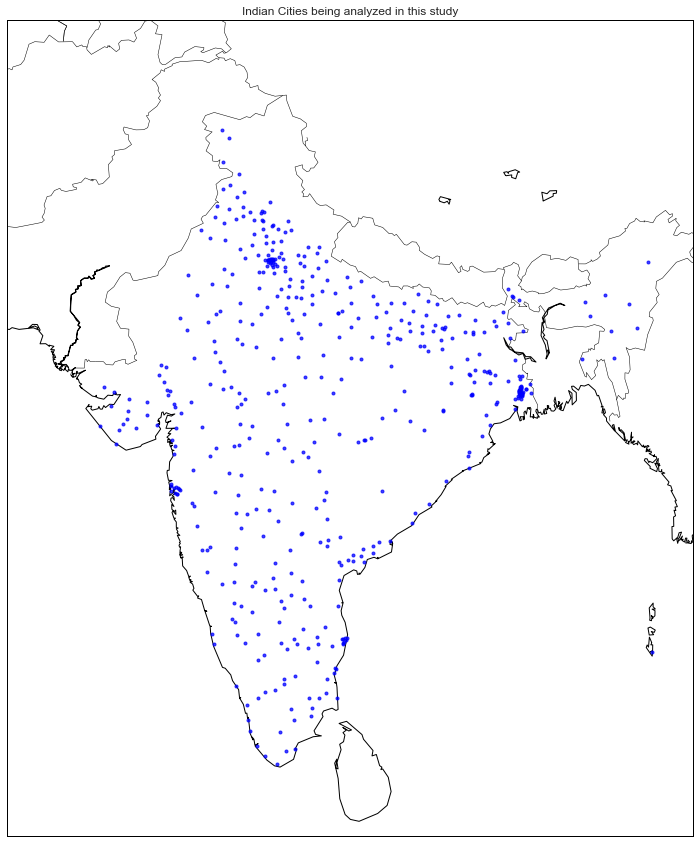

In [25]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Plot the cities part of our data analysis
for rows in np.arange(1,len(cities),1):
   x, y = map(cities["longitude"][rows],cities["latitude"][rows])
   map.plot(x, y, marker='.',color="blue", alpha = 0.75)

plt.title("Indian Cities being analyzed in this study")
plt.show()

#### C.3. PLOT CITY POPULATION ON MAP

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


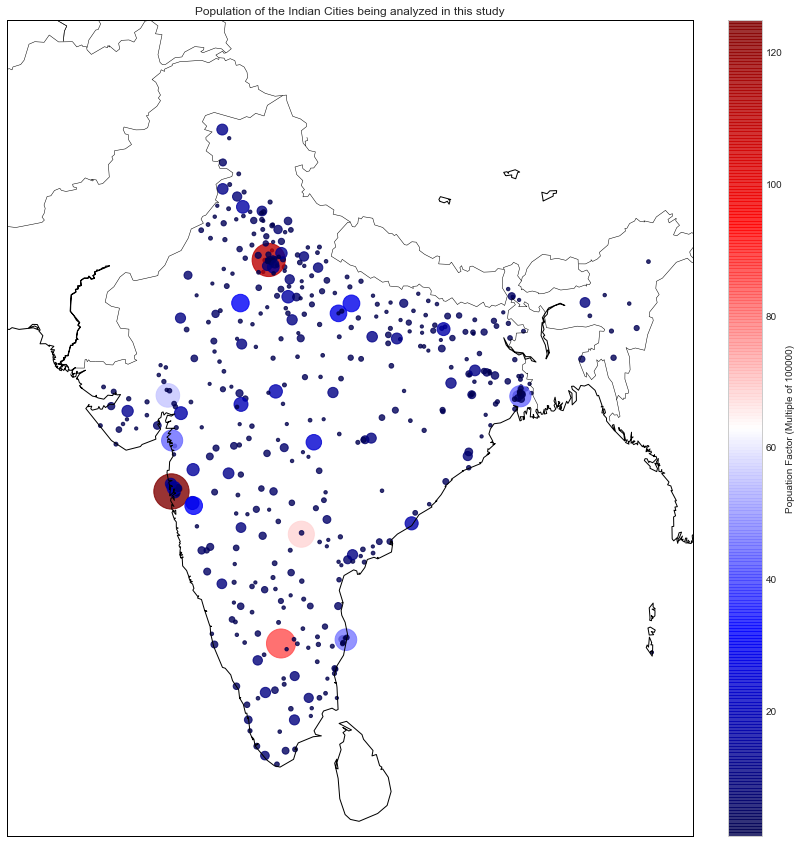

In [26]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(width=1200000,height=900000,projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)

map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Create the longitude-Latitude combination
x_location, y_location = map(np.array(cities["longitude"]),np.array(cities["latitude"]))

locations = plt.scatter(x_location, y_location, marker='o', alpha = 0.8,
            s=cities["population_factor"] * 10, c=cities["population_factor"], 
            cmap = plt.get_cmap('seismic'))

# Add a colorbar as legend to the right
cbar = map.colorbar(locations, location='right', label="Popuation Factor (Multiple of 100000)", pad = "5%")


plt.title("Population of the Indian Cities being analyzed in this study")
plt.show()

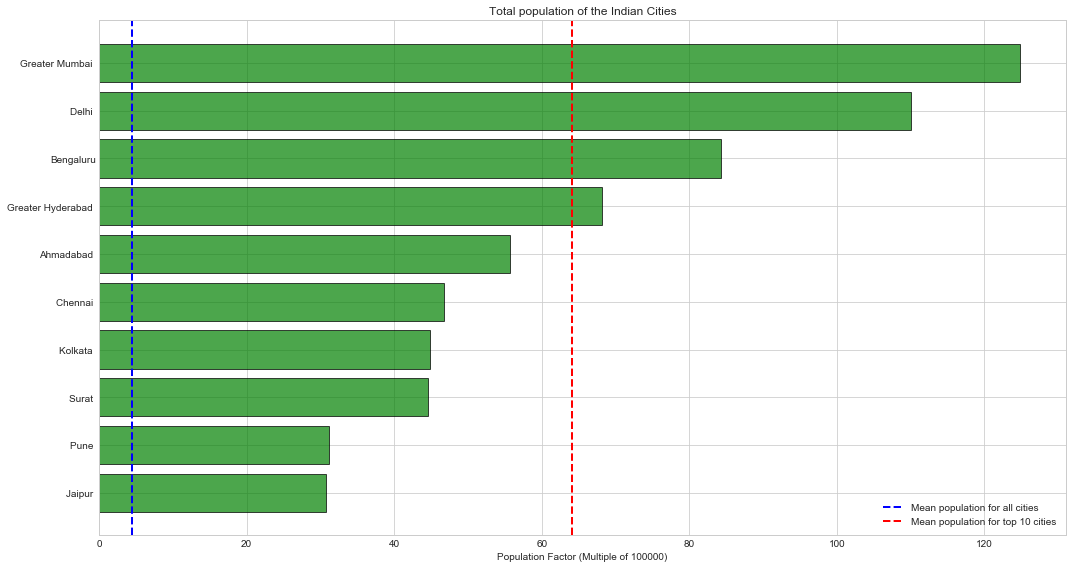

In [45]:
cities.sort_values(['population_factor'], inplace= True)
figure = plt.figure(figsize = (15,8))
plt.barh(cities['name_of_city'].tail(10), cities['population_factor'].tail(10), color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.axvline(x = np.mean(cities['population_factor']), linestyle = "dashed", 
            linewidth = 2 , color = "blue", label = "Mean population for all cities")
plt.axvline(x = np.mean(cities['population_factor'].tail(10)), linestyle = "dashed", 
            linewidth = 2 , color = "red", label = "Mean population for top 10 cities")
plt.title("Total population of the Indian Cities")
plt.xlabel("Population Factor (Multiple of 100000)")
plt.legend()
plt.tight_layout()
plt.show()

#### INFERENCE OF PLOTTING CITY POPULATION ON MAP

As expected, 
1. the population is higher in the metros and major cities.
2. In fact, the mean population of top 10 cities by population exceeds the mean population of all the cities **by almost 60 times**.

In [28]:
print ("INFERENCE OF PLOTTING CITY POPULATION ON MAP")
print ("--------------------------------------------")
print ("")
print ("As expected, ")
print ("\t 1.the population is higher in the metros and major cities.")
print ("\t 2.In fact, the mean population of top 10 cities by population exceeds the mean population of all the cities by almost 60 times.")

INFERENCE OF PLOTTING CITY POPULATION ON MAP
--------------------------------------------

As expected, 
	 1.the population is higher in the metros and major cities.
	 2.In fact, the mean population of top 10 cities by population exceeds the mean population of all the cities by almost 60 times.


**Now, considering that plotting all the cities are making things difficult to interpret. We will be plotting only the top 20 cities by population.**

In [29]:
top_cities = cities.nlargest(20, "population_total")

#### C.3. ANALYSIS - LITERACY RATE FOR THE CITIES WITH HIGHEST POPULATION

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


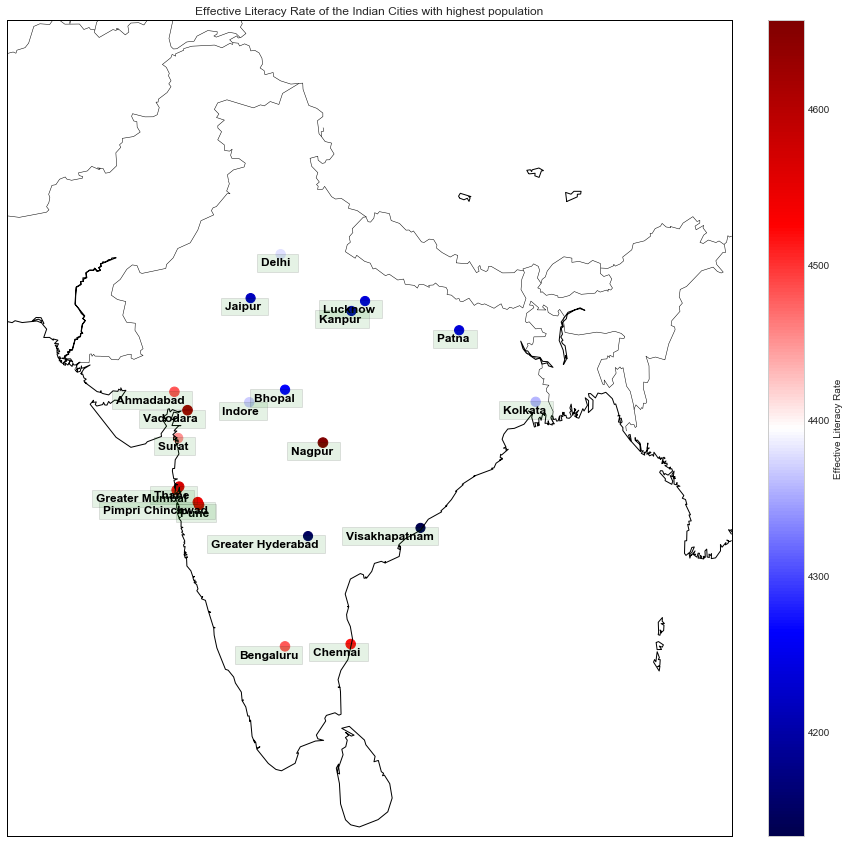

In [30]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=23,lon_0=80)

map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Create the longitude-Latitude combination
x_location, y_location = map(np.array(top_cities["longitude"]),np.array(top_cities["latitude"]))

# Plot the cities
locations = plt.scatter(x_location, y_location, marker='o',
            s=top_cities["effective_literacy_rate_total"], c=top_cities["effective_literacy_rate_total"]*50, 
            cmap = plt.get_cmap('seismic'))

# Add city name
for city_name, lat, lon in zip(np.array(top_cities["name_of_city"]),x_location, y_location):
    plt.text(lat + 60000, lon - 60000, city_name, fontsize=12,fontweight='bold',
                    ha='right',va='bottom',color='k',
                    bbox=dict(facecolor='g', alpha=0.1))

# Add a colorbar as legend to the right
cbar = map.colorbar(locations, location='right', label="Effective Literacy Rate", pad = "5%")


plt.title("Effective Literacy Rate of the Indian Cities with highest population")
plt.show()

Plotting the same information as a bar plot to correlate.

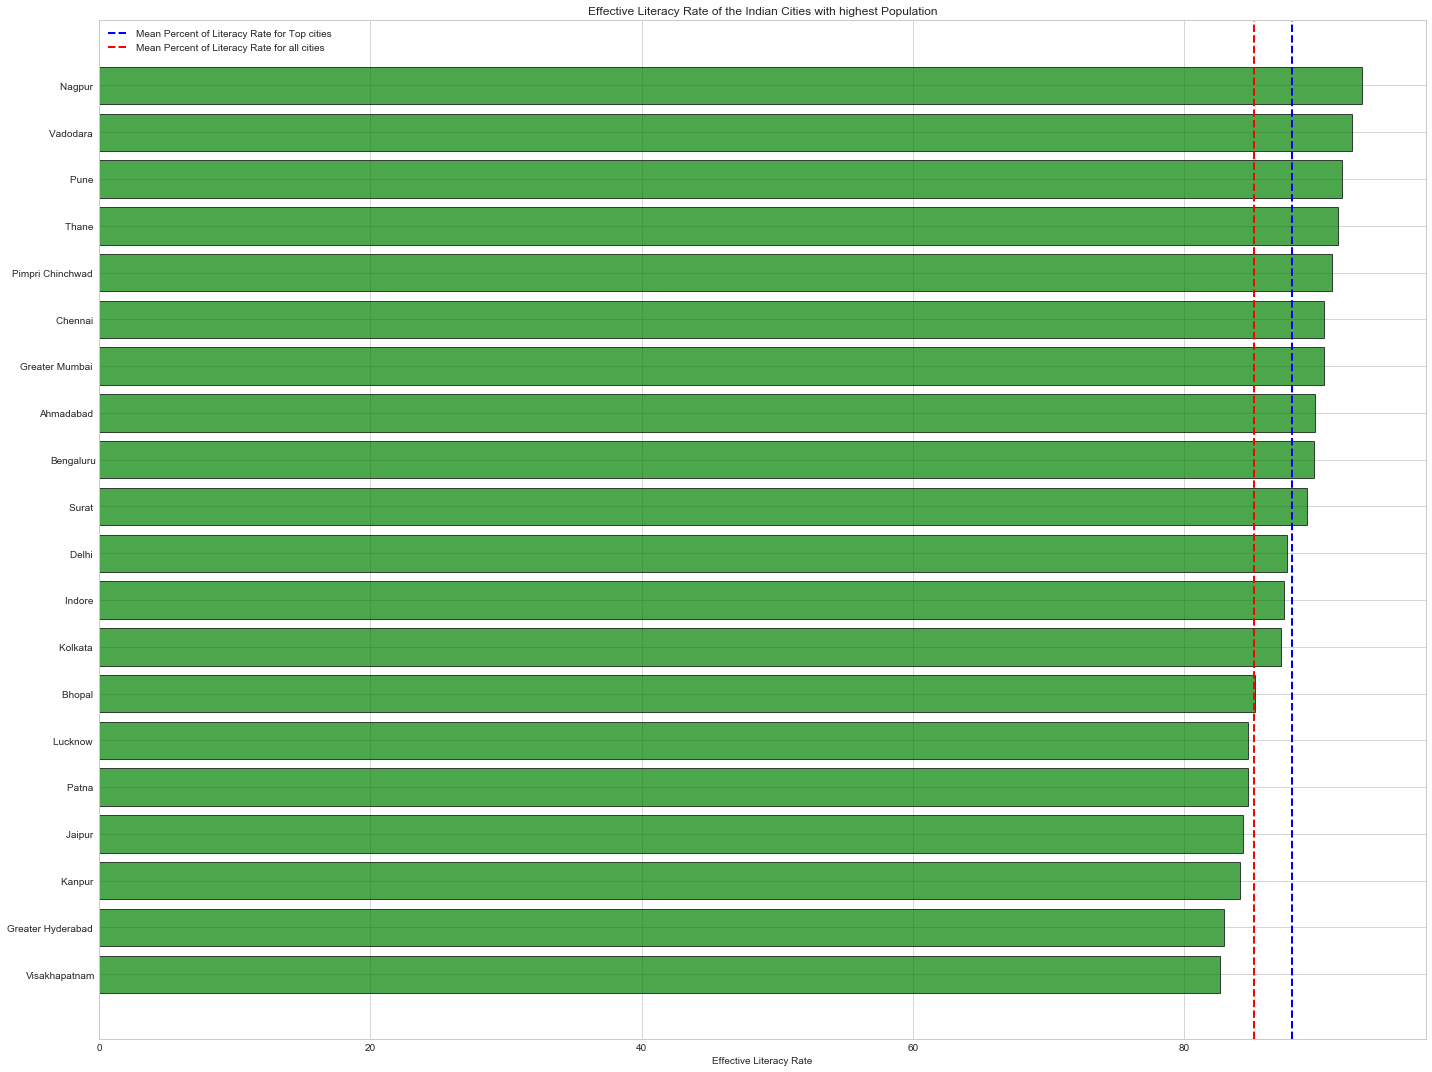

In [31]:
top_cities.sort_values(['effective_literacy_rate_total'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(top_cities['name_of_city'], top_cities['effective_literacy_rate_total'], color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.axvline(x = np.mean(top_cities['effective_literacy_rate_total']), linestyle = "dashed", 
            linewidth = 2 , color = "blue", label = "Mean Percent of Literacy Rate for Top cities")
plt.axvline(x = np.mean(cities['effective_literacy_rate_total']), linestyle = "dashed", 
            linewidth = 2 , color = "red", label = "Mean Percent of Literacy Rate for all cities")
plt.title("Effective Literacy Rate of the Indian Cities with highest Population")
plt.xlabel("Effective Literacy Rate")
plt.legend()
plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - LITERACY RATE FOR THE CITIES WITH HIGHEST POPULATION

1. Nagpur has the highest literacy rate amongst the Indian cities with the highest population, followed by Vadodara and Pune.
2. As expected, the mean literacy rate amongst the Indian cities with the highest population is greater than the mean literacy rate amongst all Indian cities.

In [32]:
print ("INFERENCE OF ANALYSIS - LITERACY RATE FOR THE CITIES WITH HIGHEST POPULATION")
print ("-----------------------------------------------------------------------------")
print ("")
print ("\t 1.Nagpur has the highest literacy rate amongst the Indian cities with the highest population, followed by Vadodara and Pune.")
print ("\t 2.In fact, the mean population of top 10 cities by population exceeds the mean population of all the cities by almost 60 times.")

INFERENCE OF ANALYSIS - LITERACY RATE FOR THE CITIES WITH HIGHEST POPULATION
-----------------------------------------------------------------------------

	 1.Nagpur has the highest literacy rate amongst the Indian cities with the highest population, followed by Vadodara and Pune.
	 2.In fact, the mean population of top 10 cities by population exceeds the mean population of all the cities by almost 60 times.


#### C.4. ANALYSIS - GENDER RATIO FOR THE CITIES WITH HIGHEST POPULATION

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


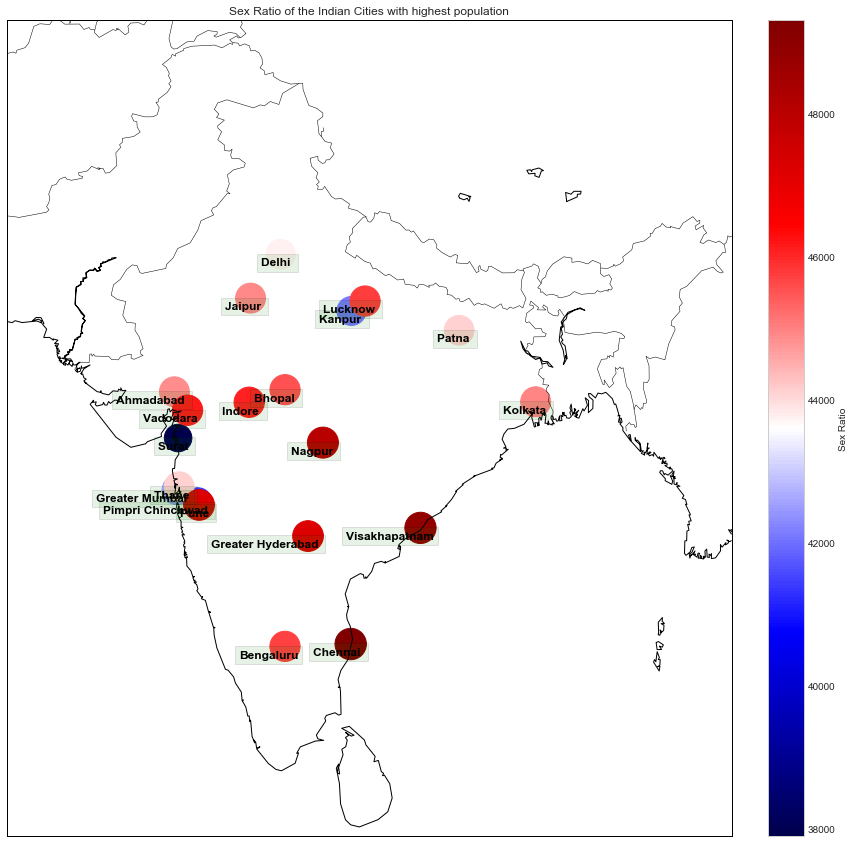

In [33]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=23,lon_0=80)

map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Create the longitude-Latitude combination
x_location, y_location = map(np.array(top_cities["longitude"]),np.array(top_cities["latitude"]))

# Plot the cities
locations = plt.scatter(x_location, y_location, marker='o',
            s=top_cities["sex_ratio"], c=top_cities["sex_ratio"]*50, 
            cmap = plt.get_cmap('seismic'))

# Add city name
for city_name, lat, lon in zip(np.array(top_cities["name_of_city"]),x_location, y_location):
    plt.text(lat + 60000, lon - 60000, city_name, fontsize=12,fontweight='bold',
                    ha='right',va='bottom',color='k',
                    bbox=dict(facecolor='g', alpha=0.1))

# Add a colorbar as legend to the right
cbar = map.colorbar(locations, location='right', label="Sex Ratio", pad = "5%")


plt.title("Sex Ratio of the Indian Cities with highest population")
plt.show()

Plotting the same information as a bar plot to correlate.

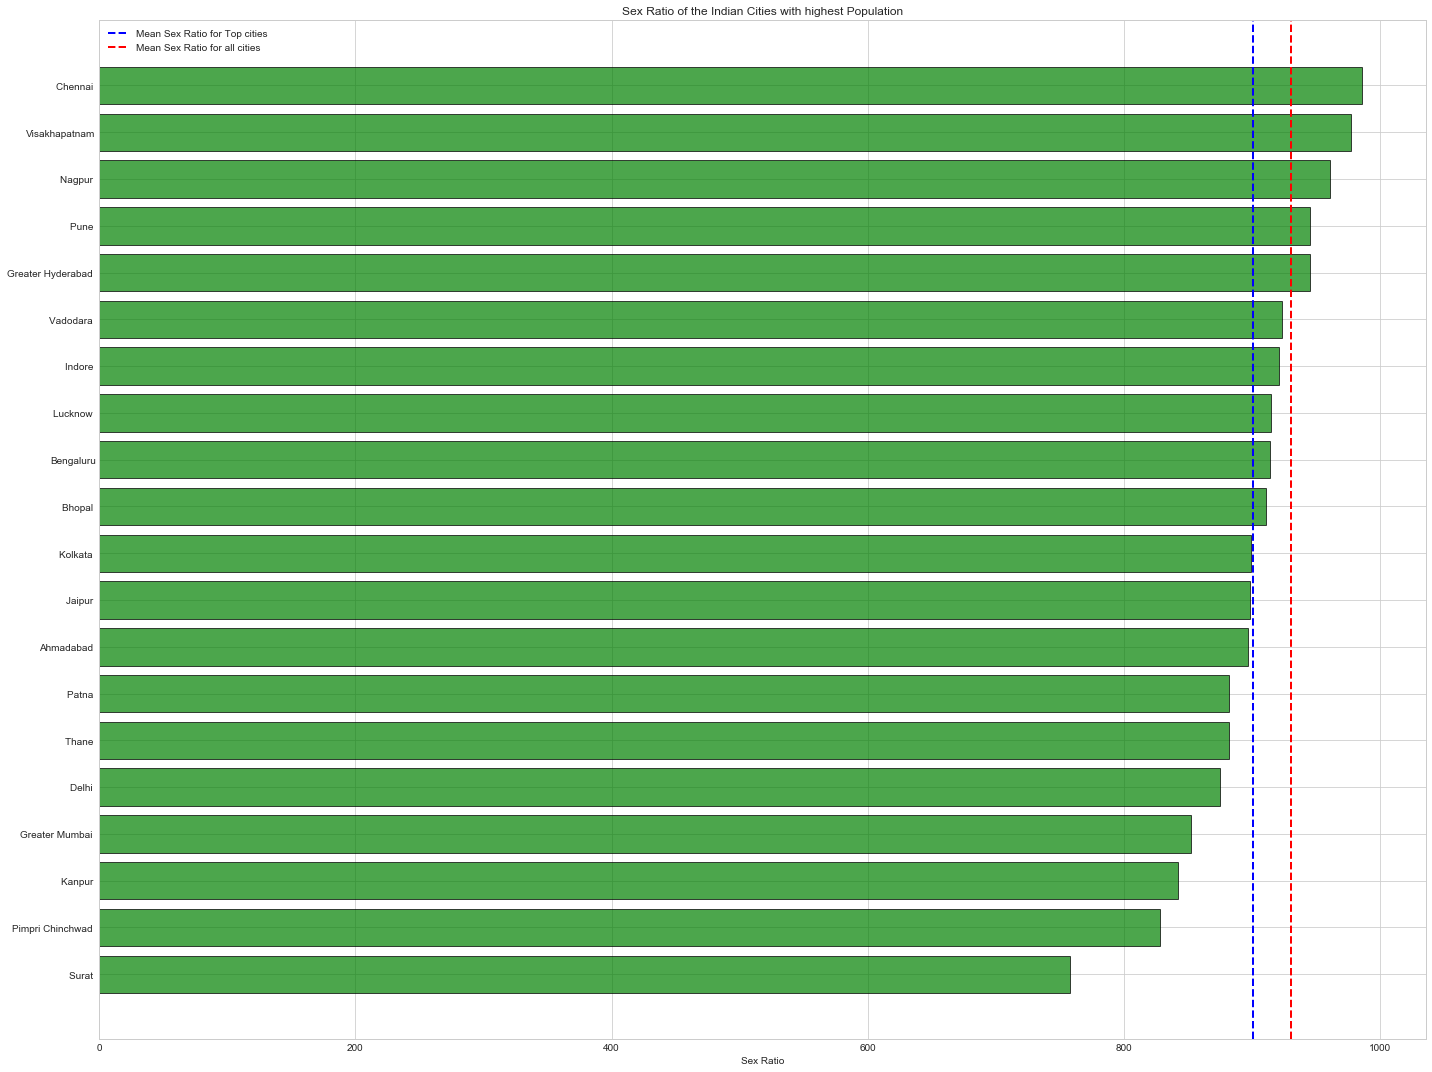

In [34]:
top_cities.sort_values(['sex_ratio'], inplace= True)
figure = plt.figure(figsize = (20,15))
plt.barh(top_cities['name_of_city'], top_cities['sex_ratio'], color = "green", 
         edgecolor = "black", alpha = 0.7)
plt.axvline(x = np.mean(top_cities['sex_ratio']), linestyle = "dashed", 
            linewidth = 2 , color = "blue", label = "Mean Sex Ratio for Top cities")
plt.axvline(x = np.mean(cities['sex_ratio']), linestyle = "dashed", 
            linewidth = 2 , color = "red", label = "Mean Sex Ratio for all cities")
plt.title("Sex Ratio of the Indian Cities with highest Population")
plt.xlabel("Sex Ratio")
plt.legend()
plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - GENDER RATIO FOR THE CITIES WITH HIGHEST POPULATION

1. Chennai has the highest Female to Male ratio (per 1000 males) amongst the Indian cities with the highest population, followed by Vishakhapatnam and Nagpur.
2. Unexpectedly, the mean sex ratio amongst the Indian cities with the highest population is lower than the mean sex ratio amongst all Indian cities.

In [35]:
print ("INFERENCE OF ANALYSIS - GENDER RATIO FOR THE CITIES WITH HIGHEST POPULATION")
print ("-----------------------------------------------------------------------------")
print ("")
print ("\t 1.Chennai has the highest Female to Male ratio (per 1000 males) amongst the Indian cities with the highest population, followed by Vishakhapatnam and Nagpur.")
print ("\t 2.Unexpectedly, the mean sex ratio amongst the Indian cities with the highest population is lower than the mean sex ratio amongst all Indian cities.")

INFERENCE OF ANALYSIS - GENDER RATIO FOR THE CITIES WITH HIGHEST POPULATION
-----------------------------------------------------------------------------

	 1.Chennai has the highest Female to Male ratio (per 1000 males) amongst the Indian cities with the highest population, followed by Vishakhapatnam and Nagpur.
	 2.Unexpectedly, the mean sex ratio amongst the Indian cities with the highest population is lower than the mean sex ratio amongst all Indian cities.


#### C.5. ANALYSIS - INFANT RATIO FOR THE CITIES WITH HIGHEST POPULATION

In [36]:
cities['infants_percent'] = round(cities['0-6_population_total']/ cities['population_total'],2)
cities['male_infants_percent'] = round(cities['0-6_population_male']/ cities['population_total'],2)
cities['female_infants_percent'] = round(cities['0-6_population_female']/ cities['population_total'],2)
top_cities = cities.nlargest(20, "population_total")

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


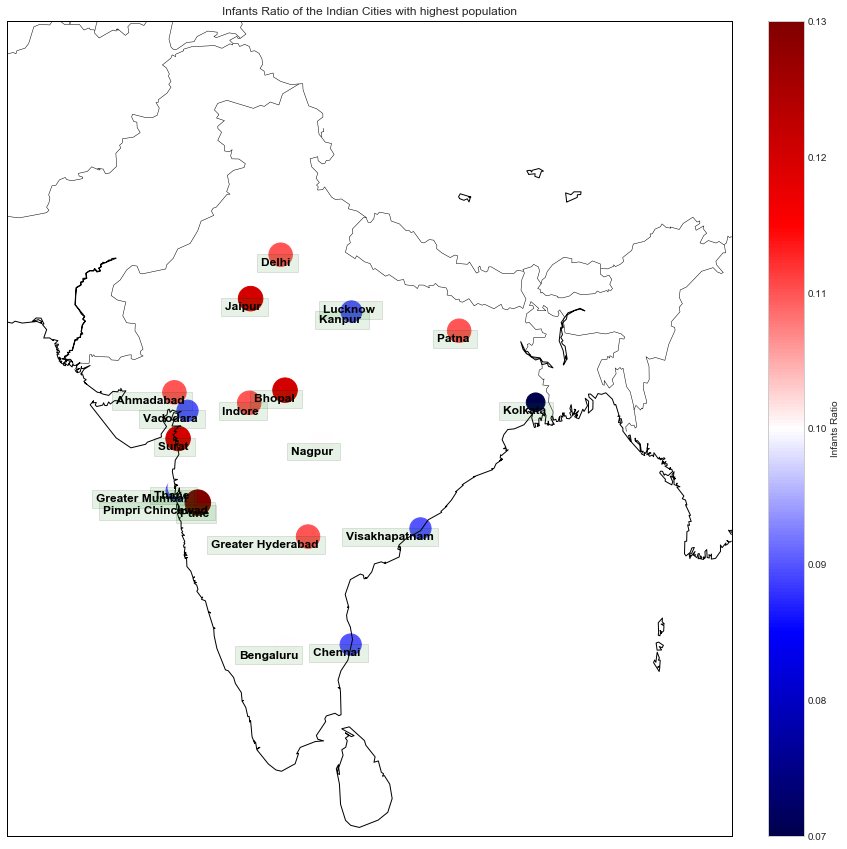

In [37]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=23,lon_0=80)

map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Create the longitude-Latitude combination
x_location, y_location = map(np.array(top_cities["longitude"]),np.array(top_cities["latitude"]))

# Plot the cities
locations = plt.scatter(x_location, y_location, marker='o',
            s=top_cities["infants_percent"]*5000, c=top_cities["infants_percent"], 
            cmap = plt.get_cmap('seismic'))

# Add city name
for city_name, lat, lon in zip(np.array(top_cities["name_of_city"]),x_location, y_location):
    plt.text(lat + 60000, lon - 60000, city_name, fontsize=12,fontweight='bold',
                    ha='right',va='bottom',color='k',
                    bbox=dict(facecolor='g', alpha=0.1))

# Add a colorbar as legend to the right
cbar = map.colorbar(locations, location='right', label="Infants Ratio", pad = "5%")


plt.title("Infants Ratio of the Indian Cities with highest population")
plt.show()

Plotting the same information as a bar plot to correlate.

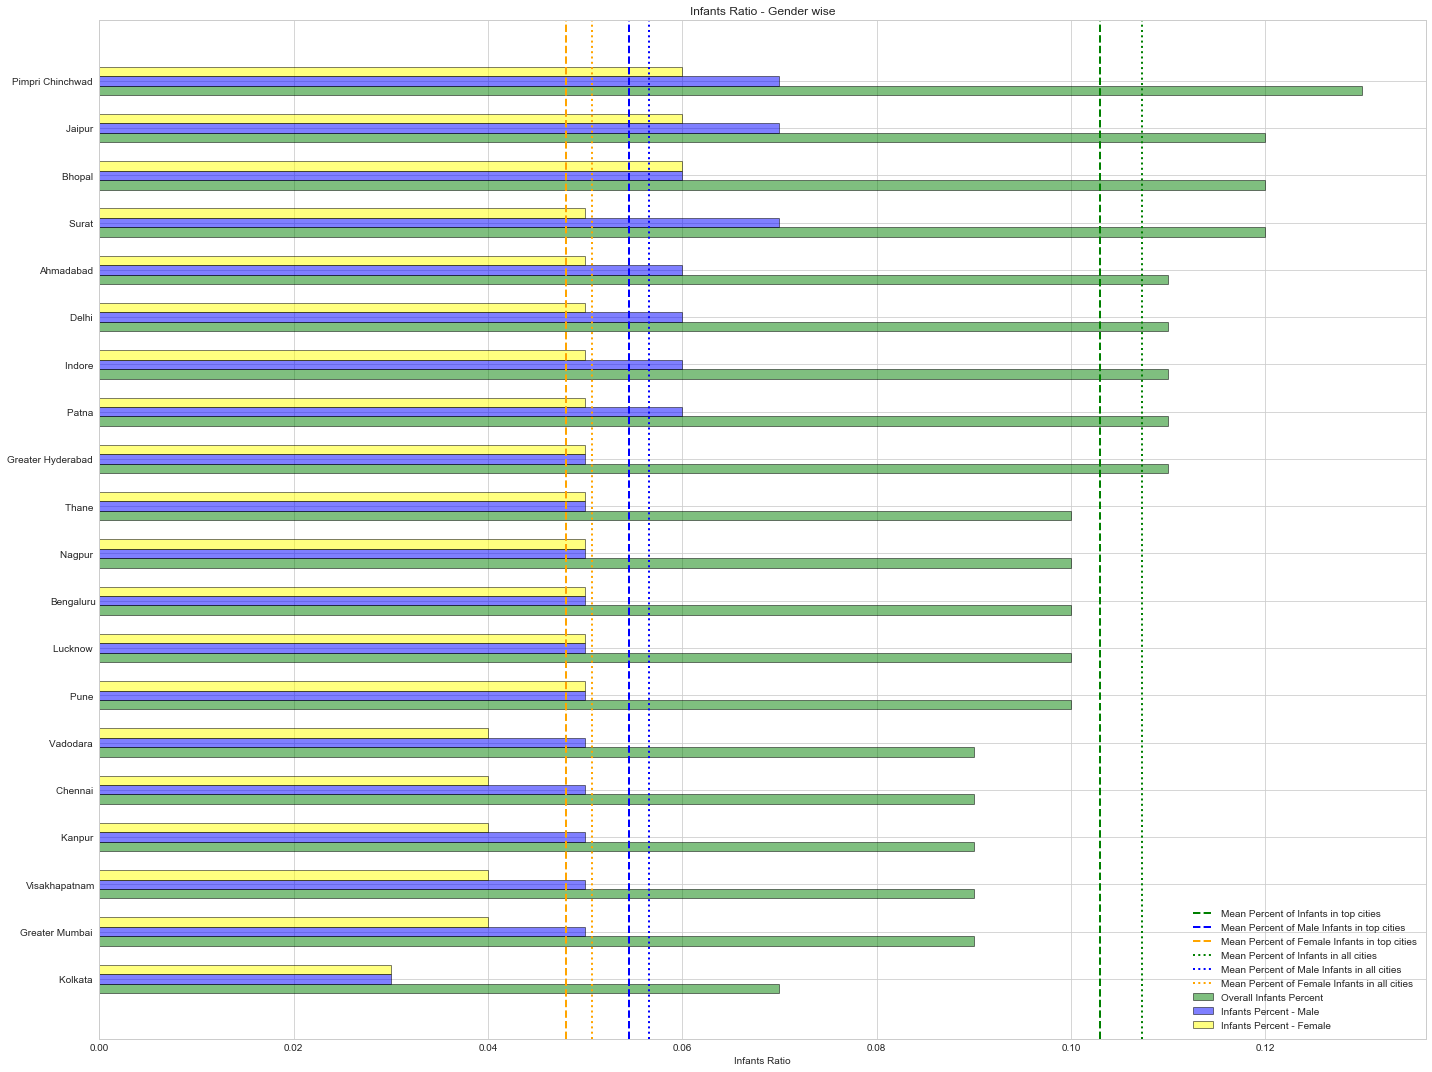

In [38]:
top_cities.sort_values(['infants_percent'], inplace= True)
figure = plt.figure(figsize = (20,15))
barWidth = 0.20
y_pos = np.arange(len(top_cities['name_of_city']))
plt.barh(y_pos - barWidth, top_cities['infants_percent'], height = barWidth, color = "green",
         edgecolor = "black", alpha = 0.5, label = "Overall Infants Percent")
plt.barh(y_pos, top_cities['male_infants_percent'], color = "blue", height = barWidth, 
         edgecolor = "black", alpha = 0.5, label = "Infants Percent - Male")
plt.barh(y_pos + barWidth, top_cities['female_infants_percent'],  height = barWidth,color = "yellow",
         edgecolor = "black", alpha = 0.5, label = "Infants Percent - Female")
plt.title("Infants Ratio - Gender wise")
plt.xlabel("Infants Ratio")
plt.yticks(ticks = y_pos, labels = top_cities['name_of_city'])

plt.axvline(x = np.mean(top_cities['infants_percent']), linestyle = "dashed", 
            linewidth = 2 , color = "green", label = "Mean Percent of Infants in top cities")
plt.axvline(x = np.mean(top_cities['male_infants_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "blue", label = "Mean Percent of Male Infants in top cities")
plt.axvline(x = np.mean(top_cities['female_infants_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "orange", label = "Mean Percent of Female Infants in top cities")

plt.axvline(x = np.mean(cities['infants_percent']), linestyle = "dotted", 
            linewidth = 2 , color = "green", label = "Mean Percent of Infants in all cities")
plt.axvline(x = np.mean(cities['male_infants_percent']), linestyle = "dotted", 
            linewidth = 2 ,color = "blue", label = "Mean Percent of Male Infants in all cities")
plt.axvline(x = np.mean(cities['female_infants_percent']), linestyle = "dotted", 
            linewidth = 2 ,color = "orange", label = "Mean Percent of Female Infants in all cities")

plt.legend()

plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - INFANT RATIO FOR THE CITIES WITH HIGHEST POPULATION

1. Pimpri-Chinchwad has the highest percent of infants, followed by Jaipur, Bhopal and Surat.
2. Male infants are more compared to female infants.
3. The percentage of infants amongst the top 20 cities with highest population is lower than that of all the cities. 

In [39]:
print ("INFERENCE OF ANALYSIS - INFANT RATIO FOR THE CITIES WITH HIGHEST POPULATION")
print ("-----------------------------------------------------------------------------")
print ("")
print ("\t 1.Pimpri-Chinchwad has the highest percent of infants, followed by Jaipur, Bhopal and Surat.")
print ("\t 2.Male infants are more compared to female infants.")
print ("\t 3.The percentage of infants amongst the top 20 cities with highest population is lower than that of all the cities. ")

INFERENCE OF ANALYSIS - INFANT RATIO FOR THE CITIES WITH HIGHEST POPULATION
-----------------------------------------------------------------------------

	 1.Pimpri-Chinchwad has the highest percent of infants, followed by Jaipur, Bhopal and Surat.
	 2.Male infants are more compared to female infants.
	 3.The percentage of infants amongst the top 20 cities with highest population is lower than that of all the cities. 


#### C.6. ANALYSIS - GRADUATE:LITERATE RATIO FOR THE CITIES WITH HIGHEST POPULATION

Finally, let us try to understand how many of the literates in the highest populated cities are graduates.

In [40]:
cities['graduate_percent'] = round(cities['total_graduates']/ cities['literates_total'],2)
cities['male_graduate_percent'] = round(cities['male_graduates']/ cities['literates_male'],2)
cities['female_graduate_percent'] = round(cities['female_graduates']/ cities['literates_female'],2)
top_cities = cities.nlargest(20, "population_total")

C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\rayde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


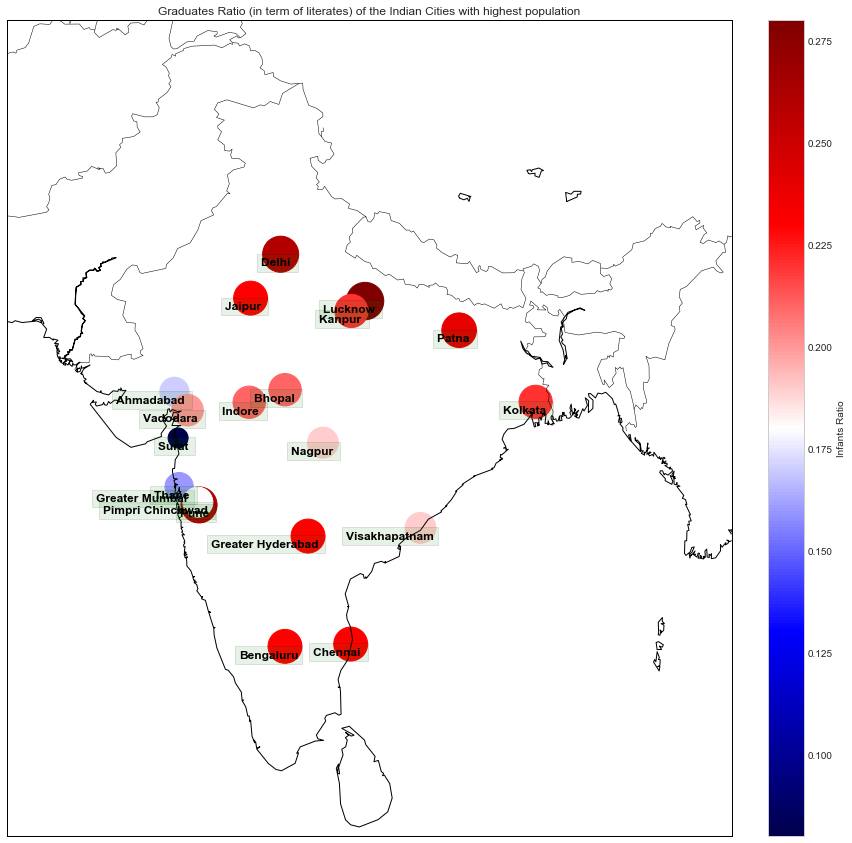

In [41]:
figure = plt.figure(figsize=(20,15))

# Draw the base map and the background
map = Basemap(projection='lcc',resolution='l',
              llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=23,lon_0=80)

map.drawcoastlines(color = "black")
map.drawcountries(color = "black")
map.drawmapboundary()

# Create the longitude-Latitude combination
x_location, y_location = map(np.array(top_cities["longitude"]),np.array(top_cities["latitude"]))

# Plot the cities
locations = plt.scatter(x_location, y_location, marker='o',
            s=top_cities["graduate_percent"]*5000, c=top_cities["graduate_percent"], 
            cmap = plt.get_cmap('seismic'))

# Add city name
for city_name, lat, lon in zip(np.array(top_cities["name_of_city"]),x_location, y_location):
    plt.text(lat + 60000, lon - 60000, city_name, fontsize=12,fontweight='bold',
                    ha='right',va='bottom',color='k',
                    bbox=dict(facecolor='g', alpha=0.1))

# Add a colorbar as legend to the right
cbar = map.colorbar(locations, location='right', label="Infants Ratio", pad = "5%")


plt.title("Graduates Ratio (in term of literates) of the Indian Cities with highest population")
plt.show()

Plotting the same information as a bar plot to correlate.

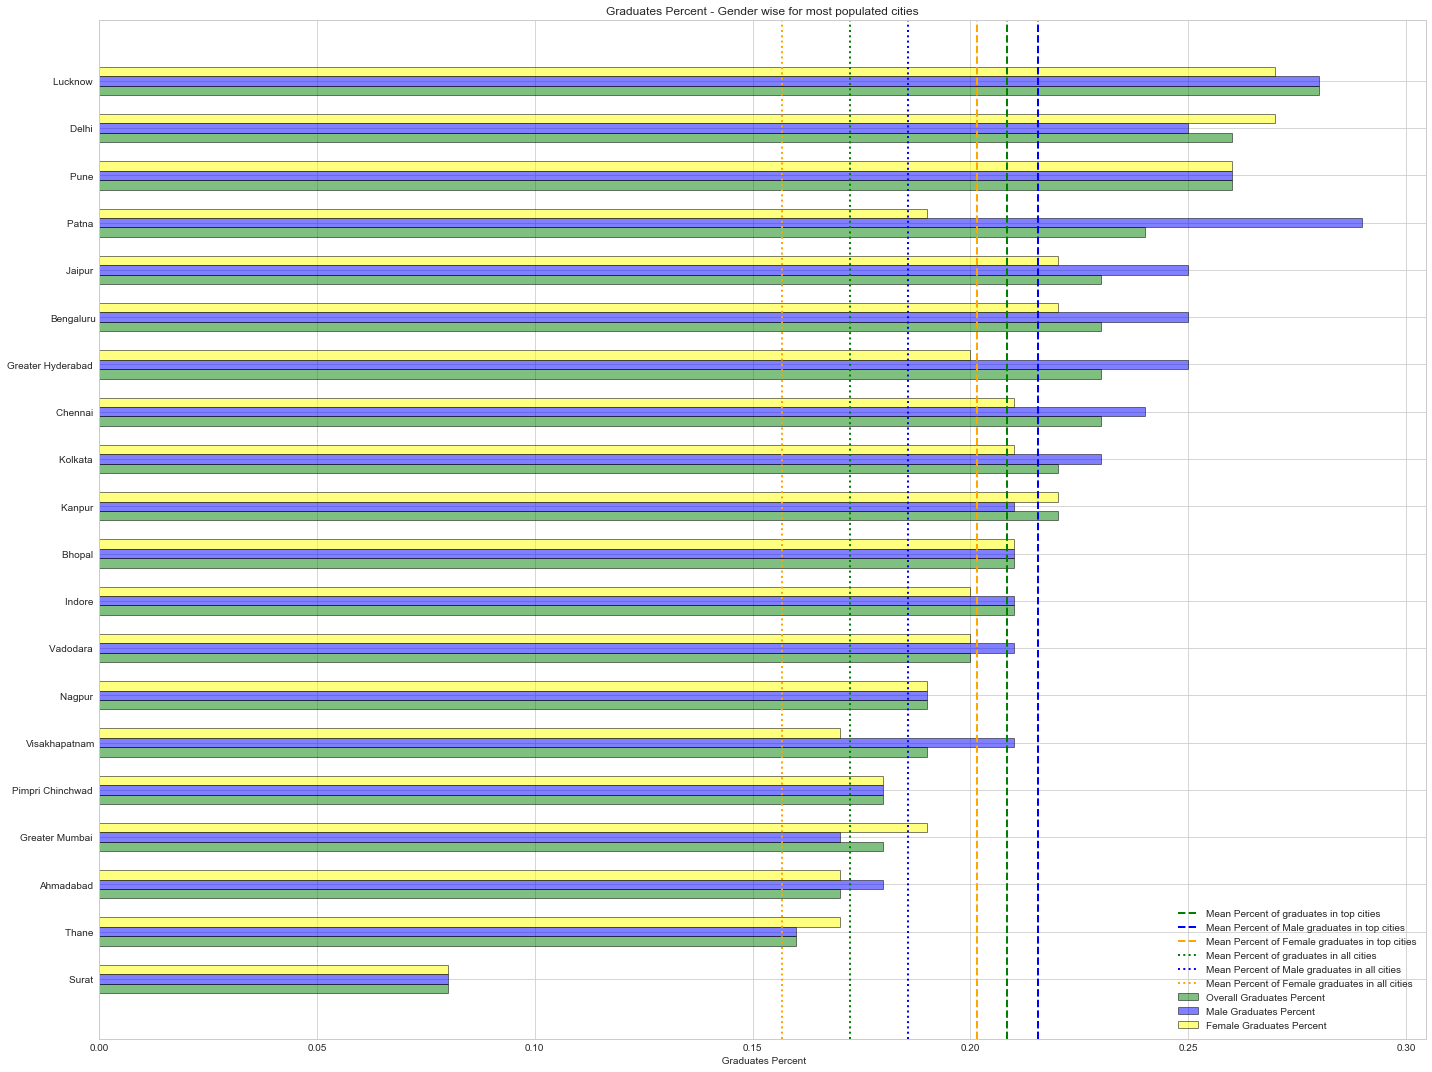

In [42]:
top_cities.sort_values(['graduate_percent'], inplace= True)
figure = plt.figure(figsize = (20,15))
barWidth = 0.20
y_pos = np.arange(len(top_cities['name_of_city']))
plt.barh(y_pos - barWidth, top_cities['graduate_percent'], height = barWidth, color = "green",
         edgecolor = "black", alpha = 0.5, label = "Overall Graduates Percent")
plt.barh(y_pos, top_cities['male_graduate_percent'], color = "blue", height = barWidth, 
         edgecolor = "black", alpha = 0.5, label = "Male Graduates Percent")
plt.barh(y_pos + barWidth, top_cities['female_graduate_percent'],  height = barWidth,color = "yellow",
         edgecolor = "black", alpha = 0.5, label = "Female Graduates Percent")
plt.title("Graduates Percent - Gender wise for most populated cities")
plt.xlabel(" Graduates Percent")
plt.yticks(ticks = y_pos, labels = top_cities['name_of_city'])

plt.axvline(x = np.mean(top_cities['graduate_percent']), linestyle = "dashed", 
            linewidth = 2 , color = "green", label = "Mean Percent of graduates in top cities")
plt.axvline(x = np.mean(top_cities['male_graduate_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "blue", label = "Mean Percent of Male graduates in top cities")
plt.axvline(x = np.mean(top_cities['female_graduate_percent']), linestyle = "dashed", 
            linewidth = 2 ,color = "orange", label = "Mean Percent of Female graduates in top cities")

plt.axvline(x = np.mean(cities['graduate_percent']), linestyle = "dotted", 
            linewidth = 2 , color = "green", label = "Mean Percent of graduates in all cities")
plt.axvline(x = np.mean(cities['male_graduate_percent']), linestyle = "dotted", 
            linewidth = 2 ,color = "blue", label = "Mean Percent of Male graduates in all cities")
plt.axvline(x = np.mean(cities['female_graduate_percent']), linestyle = "dotted", 
            linewidth = 2 ,color = "orange", label = "Mean Percent of Female graduates in all cities")

plt.legend()

plt.tight_layout()
plt.show()

#### INFERENCE OF ANALYSIS - GRADUATE:LITERATE RATIO FOR THE CITIES WITH HIGHEST POPULATION

1. Lucknow has the highest percent of graduates amongst the literates, followed by Delhi and Pune.
2. Patna has the highest percent of graduates amongst male literates, followed by Lucknow
3. Lucknow has the highest percent of graduates amongst female literates, followed by Delhi and Pune.
4. The percentage of graduates amongst the top 20 cities with highest population is higher than that of all the cities. 

In [43]:
print ("INFERENCE OF ANALYSIS - GRADUATE:LITERATE RATIO FOR THE CITIES WITH HIGHEST POPULATION")
print ("--------------------------------------------------------------------------------------")
print ("")
print ("\t 1.Lucknow has the highest percent of graduates amongst the literates, followed by Delhi and Pune.")
print ("\t 2.Patna has the highest percent of graduates amongst male literates, followed by Lucknow.")
print ("\t 3.Lucknow has the highest percent of graduates amongst female literates, followed by Delhi and Pune.")
print ("\t 4.The percentage of graduates amongst the top 20 cities with highest population is higher than that of all the cities.")

INFERENCE OF ANALYSIS - GRADUATE:LITERATE RATIO FOR THE CITIES WITH HIGHEST POPULATION
--------------------------------------------------------------------------------------

	 1.Lucknow has the highest percent of graduates amongst the literates, followed by Delhi and Pune.
	 2.Patna has the highest percent of graduates amongst male literates, followed by Lucknow.
	 3.Lucknow has the highest percent of graduates amongst female literates, followed by Delhi and Pune.
	 4.The percentage of graduates amongst the top 20 cities with highest population is higher than that of all the cities.


## ANSWERS TO THE QUESTIONS ASKED EARLIER

1. Which states are most represented in the dataset?  
**Uttar Pradesh has the highest number of cities followed by West Bengal in the dataset.**  
     
2. Which state has the highest and lowest literacy rates?   
**Mizoram has the highest cities rate followed by Kerala. Even individual gender wise, these states are the clear leaders.**  
**Uttar Pradesh has the worst literacy rate amongst the states.**  

3. Which state has the highest graduate counts?  
**Maharashtra has the higest number of graduates by absolute numbers in both Male and Female category followed by Uttar Pradesh.**  

4. Which state has the highest and lowest number of literates graduating?   
**Manipur and Himachal Pradesh have the highest number of literates graduating, with Mizoram having the least number of graduates per literate person**  

5. Which state has the highest number of infants?  
**Maharashtra has the highes number of infants/ babies (0 to 6 years) by the count**   
  
6. Which state has the highest number of infants:adults ratio?  
**Bihar has the highest number of infants per adult**  
  
**7. For the cities with the highest population**  
>a. Which city has the highest literacy rate?   
**Nagpur has the highest literacy rate amongst the Indian cities with the highest population, followed by Vadodara and Pune.**  
>b. Which city has the highest Female to Male gender ratio?   
**Chennai has the highest Female to Male ratio (per 1000 males) amongst the Indian cities with the highest population, followed by Vishakhapatnam and Nagpur.**  
>c. Which city has the highest infants:adults ratio?   
**Pimpri-Chinchwad has the highest percent of infants, followed by Jaipur, Bhopal and Surat.**  
>d. Which city has the highest number of literates graduating?   
**Lucknow has the highest percent of graduates amongst the literates, followed by Delhi and Pune.**